# Seismic Analysis of the 2017 Kos Earthquake in Greece

**Abstract:** This comprehensive seismic analysis centers on the 2017 Kos earthquake near the island of Kos in Greece. With a magnitude of approximately 6.7, this seismic event had a significant regional impact, resulting in substantial damage. By employing advanced data processing techniques and the ObsPy library, we delve into the seismological characteristics, including seismic waveforms and spectrograms, shedding light on their intricate properties. The flexibility of customizable file paths enhances code adaptability for diverse data directories, fostering more efficient seismic data analysis workflows. This study contributes valuable insights into both the specific seismic event and the broader realm of seismic data analysis, serving as a valuable resource for seismologists and researchers alike.

## Introduction
The study of seismic events provides valuable insights into the Earth's dynamics and the potential impact on regions affected. In this project, we focus on the 2017 Kos earthquake, a significant event that occurred near the island of Kos in Greece on July 20, 2017. This earthquake had a magnitude of approximately 6.7 and resulted in substantial damage to the region.

Understanding the seismological characteristics of this event and its implications is crucial for both seismologists and the local population. By analyzing the seismic data from this earthquake, we aim to uncover valuable information about the earthquake's properties, impact, and the broader geological context.

### USGS ShakeMap
To visualize the extent of ground shaking caused by the 2017 Kos earthquake, we can refer to the ShakeMap provided by the United States Geological Survey (USGS). The ShakeMap provides a color-coded representation of the shaking intensity across the affected area.

<!-- Insert the ShakeMap image here -->
<img src=https://upload.wikimedia.org/wikipedia/commons/7/78/2017_Kos_earthquake_intensity_map.jpg>

## Objectives
The primary objectives of this analysis include:
- Investigating the seismological properties of the 2017 Kos earthquake.
- Visualizing the recorded ground motion during the event.

Through these objectives, we hope to contribute to the understanding of seismic events, their consequences, and the measures that can be taken to mitigate their impact.

Let's begin our analysis by exploring the available seismic data and understanding the context of the 2017 Kos earthquake.

## Motivation
The selection of the 2017 Kos earthquake for analysis is driven by several compelling reasons. This earthquake is a relatively recent event and, as such, offers a valuable opportunity to study the seismological characteristics of a significant seismic event that has occurred in the last decade.

**Relevance to Seismology:** The 2017 Kos earthquake presents an interesting case study for seismologists. By analyzing the data from this earthquake, we can gain insights into the behavior of the Earth's crust and the underlying geological processes that led to the event. The earthquake's magnitude, location, and depth provide important information about the tectonic forces in the region.

**Impact on the Region:** The seismic event had notable consequences for the island of Kos and its neighboring areas. Understanding the impact of the earthquake on infrastructure, buildings, and the local community is essential for assessing the vulnerability of the region to seismic hazards. This analysis contributes to the broader field of earthquake engineering and disaster management.

In summary, the 2017 Kos earthquake offers a significant opportunity to delve into both the scientific and societal aspects of seismic events. By studying its characteristics and impact, we can contribute to the knowledge base of seismology and help inform strategies for better preparedness in earthquake-prone regions.

Let's proceed to the next section where we will discuss the process of selecting relevant seismic stations for our analysis.


In [8]:
from obspy import UTCDateTime
from obspy.clients.fdsn import Client

# Define the time window and geographic boundaries
start_time = UTCDateTime("2008-07-20T00:00:00.000")
end_time = UTCDateTime("2018-07-20T00:00:00.000")
min_latitude = 36.80  # N
max_latitude = 37.00  # N
min_longitude = 27.20  # E
max_longitude = 27.60  # E

# Initialize a FDSN client
client = Client("NOA")

# Retrieve seismic events within the specified criteria
catalog = client.get_events(
    starttime=start_time,
    endtime=end_time,
    minlatitude=min_latitude,
    maxlatitude=max_latitude,
    minlongitude=min_longitude,
    maxlongitude=max_longitude,
    maxdepth=1000,
    minmagnitude=0,
    maxmagnitude=8,
    orderby="time-asc"
)

In this comprehensive analysis, we structure the extracted earthquake data into a detailed seismic catalog. The dataset encompasses crucial information, including earthquake dates, times, geographic coordinates (latitude and longitude), depths, magnitudes, and magnitude types. Additionally, we conduct an insightful examination of the earthquake magnitude distribution. This statistical analysis provides a clear visualization of the distribution of earthquake magnitudes recorded within the specified timeframe. 

This analysis serves as a valuable resource for understanding the seismic activity captured in the dataset and gaining insights into the distribution of earthquake magnitudes during the examined period.

date             time   latitude  longitude        depth  \
0    2017-08-07  00:01:50.450000  36.994700  27.373500  11000.00000   
1    2014-10-08  00:02:04.880000  36.984800  27.396200  29100.00000   
2    2012-07-13  00:02:35.940000  36.816800  27.423800  15500.00000   
3    2018-01-28  00:03:32.140000  36.929000  27.339000  10800.00000   
4    2017-08-10  00:04:04.220000  36.886800  27.343000  11800.00000   
..          ...              ...        ...        ...          ...   
463  2017-12-24  23:51:42.070000  36.947200  27.365800  13000.00000   
464  2017-08-01  23:52:20.343055  36.987305  27.524414  15832.68229   
465  2017-08-18  23:52:38.560000  36.941800  27.331700  14800.00000   
466  2017-07-20  23:53:39.602689  36.972656  27.597656  12091.14583   
467  2017-07-29  23:58:31.470000  36.964200  27.573300  11200.00000   

     magnitude magnitude_type  
0     2.300000            MLh  
1     2.400000            MLh  
2     2.100000            MLh  
3     2.600000            MLh  
4     2.800000            MLh  
..         ...            ...  
463   2.600000            MLh  
464   3.074530            MLh  
465   2.700000            MLh  
466   3.942033            MLh  
467   2.600000            MLh  

[468 rows x 7 columns]

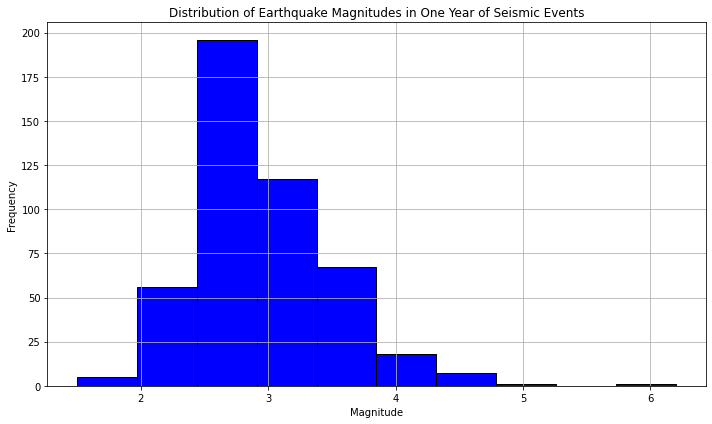

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

# Extract relevant data from the seismic catalog
dates = []
times = []
latitudes = []
longitudes = []
magnitudes = []
magnitude_types = []
depths = []

for event in catalog:
    dates.append(event.origins[0].time.date)
    times.append(event.origins[0].time.time)
    latitudes.append(event.origins[0].latitude)
    longitudes.append(event.origins[0].longitude)
    depths.append(event.origins[0].depth)
    magnitudes.append(event.magnitudes[0].mag)
    magnitude_types.append(event.magnitudes[0].magnitude_type)

# Create a DataFrame to store earthquake data
earthquake_data = pd.DataFrame({
    "date": dates,
    "time": times,
    "latitude": latitudes,
    "longitude": longitudes,
    "depth": depths,
    "magnitude": magnitudes,
    "magnitude_type": magnitude_types
})

# Sort events by time of the day
earthquake_data = earthquake_data.sort_values(by=["time"], ascending=True)
earthquake_data = earthquake_data.reset_index(drop=True)

# Display the extracted earthquake data
display(earthquake_data)

# Count the number of events for each magnitude value
magnitude_counts = earthquake_data['magnitude'].value_counts().sort_index()

# Plotting the magnitude distribution
plt.figure(figsize=(10, 6))
plt.hist(earthquake_data['magnitude'], bins=10, color='blue', edgecolor='black')
plt.title("Distribution of Earthquake Magnitudes in One Year of Seismic Events")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

#### In this section of the notebook, we are dealing with file management tasks related to the earthquake catalog data. The purpose of this code snippet is to save the processed earthquake data into a CSV file.

**Directory Preparation:** Before saving the data, we need to ensure that the destination directory exists. The code checks whether the directory specified in the `save_path` variable exists. If it doesn't, the code creates the directory using the `os.makedirs()` function. This step is essential to ensure that the file can be saved in the desired location.


In [10]:
## Change the name of the folder (Ucomment following lines)
import os

# Specify the path  
save_path = "Earthquake_Catalog"
## If the folder doesn't exist, create it
if not os.path.exists(save_path):
        os.makedirs(save_path)
earthquake_data.to_csv(save_path+"/catalog.csv", index = True)

## Seismic Data Visualization

Explore the seismic data through various visualization techniques in this analysis.

### Spatial Distribution (Epicenter Map)
We begin by creating an epicenter map that visualizes the spatial distribution of seismic events. The scatter plot represents earthquake epicenters with varying colors and sizes based on their magnitudes.

### Longitude-Depth Plot
The longitude-depth plot offers insights into the relationship between longitude and earthquake depths. This scatter plot uses color and size to represent magnitudes, providing a comprehensive view of earthquake characteristics.

### Latitude-Depth Plot
Similarly, the latitude-depth plot reveals the correlation between latitude and earthquake depths. It utilizes color and size to depict magnitudes, helping us understand the geographical and depth-related patterns of seismic events.

### Interactive 3D Seismic Data Plot
To enhance our understanding further, we present an interactive 3D plot of seismic data. This visualization showcases earthquake locations in latitude, longitude, and depth (in kilometers). Magnitude is depicted through both color and size, enabling a comprehensive exploration of the dataset.

These visualizations provide valuable insights into the spatial and depth characteristics of seismic events, aiding in the analysis and interpretation of the seismic catalog.


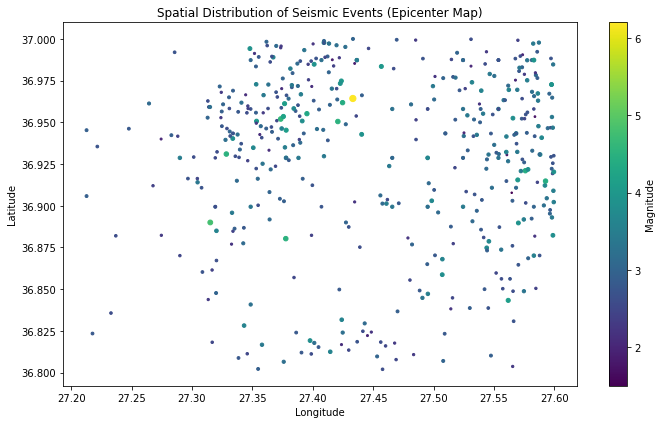

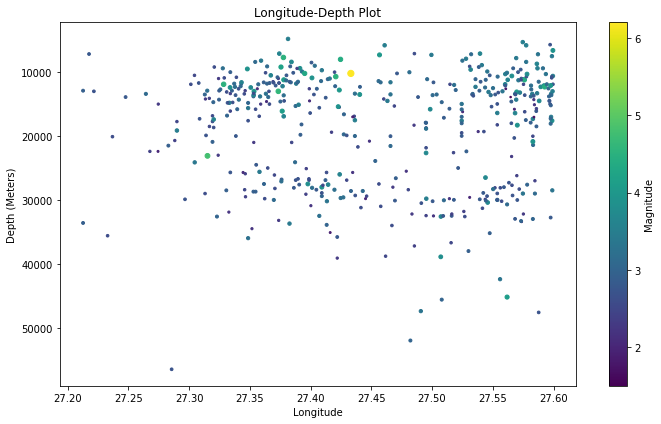

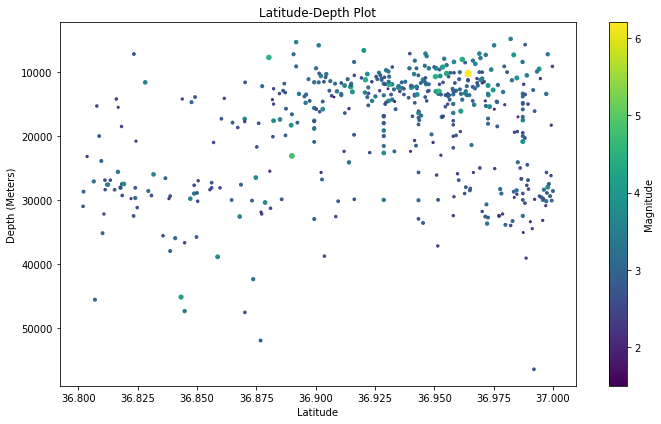

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

# Read seismic catalog data
data = pd.read_csv("Earthquake_Catalog/catalog.csv")

# Spatial Distribution (Epicenter Map)
plt.figure(figsize=(10, 6))
plt.scatter(data["longitude"], data["latitude"], c=data["magnitude"], cmap="viridis", s=data["magnitude"] ** 2)
plt.colorbar(label="Magnitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Spatial Distribution of Seismic Events (Epicenter Map)")
plt.tight_layout()
plt.show()

# Longitude-Depth Plot
plt.figure(figsize=(10, 6))
plt.scatter(data["longitude"], data["depth"], c=data["magnitude"], cmap="viridis", s=data["magnitude"] ** 2)
plt.colorbar(label="Magnitude")
plt.xlabel("Longitude")
plt.gca().invert_yaxis()
plt.ylabel("Depth (Meters)")
plt.title("Longitude-Depth Plot")
plt.tight_layout()
plt.show()

# Latitude-Depth Plot
plt.figure(figsize=(10, 6))
plt.scatter(data["latitude"], data["depth"], c=data["magnitude"], cmap="viridis", s=data["magnitude"] ** 2)
plt.colorbar(label="Magnitude")
plt.xlabel("Latitude")
plt.gca().invert_yaxis()
plt.ylabel("Depth (Meters)")
plt.title("Latitude-Depth Plot")
plt.tight_layout()
plt.show()

# Reverse the depth values
data["depth"] = -data["depth"]

# Create a 3D scatter plot
fig = px.scatter_3d(data, x="latitude", y="longitude", z="depth", color="magnitude",
                     size="magnitude", color_continuous_scale="Viridis")

fig.update_layout(scene=dict(xaxis_title="Latitude", yaxis_title="Longitude", zaxis_title="Depth (Km)"),
                  title="Interactive 3D Seismic Data Plot",
                  coloraxis_colorbar=dict(title="Magnitude"))

fig.show()

## Seismic Depth Analysis

Delve into the depth-related aspects of seismic events with this depth analysis.

### Depth Distribution
The depth distribution plot provides an overview of the distribution of earthquake depths. This histogram visualizes the frequency of seismic events at different depth intervals in meters.

### Magnitude-Depth Plot
The magnitude-depth plot explores the relationship between earthquake magnitudes and depths. This scatter plot illustrates how the magnitude of seismic events varies with depth in meters.

These visualizations contribute to a better understanding of the depth characteristics of seismic events, shedding light on their behavior and distribution in the Earth's crust.


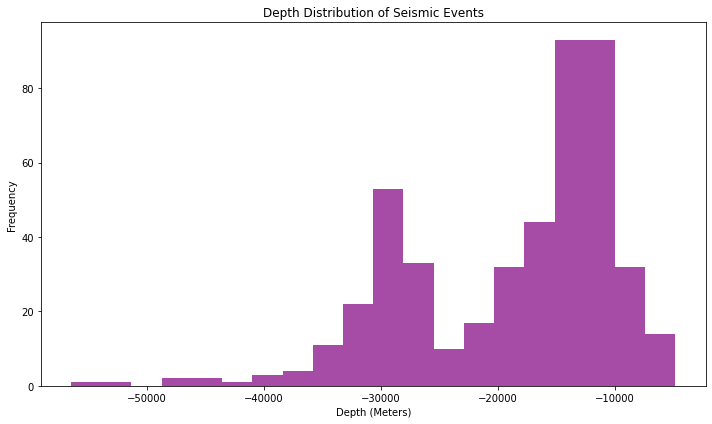

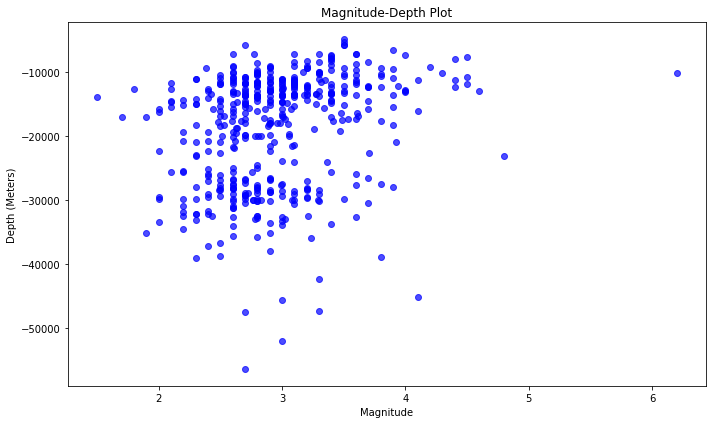

In [12]:
# Depth Distribution
plt.figure(figsize=(10, 6))
plt.hist(data["depth"], bins=20, color="purple", alpha=0.7)
plt.xlabel("Depth (Meters)")
plt.ylabel("Frequency")
plt.title("Depth Distribution of Seismic Events")
plt.tight_layout()
plt.show()

# Magnitude-Depth Plot
plt.figure(figsize=(10, 6))
plt.scatter(data["magnitude"], data["depth"], c="blue", alpha=0.7)
plt.xlabel("Magnitude")
plt.ylabel("Depth (Meters)")
plt.title("Magnitude-Depth Plot")
plt.tight_layout()
plt.show()

### Tectonic Summary:

The seismic activity in the Mediterranean region and its vicinity is primarily driven by the ongoing convergence of the African and Eurasian plates, occurring at a rate of approximately 4-10 mm per year. This convergence has been in progress for around 50 million years and was initiated with the closure of the Tethys Sea, which is now represented by the Mediterranean Sea. This complex plate boundary has given rise to a diverse range of seismic phenomena.

The most intense seismicity within the Mediterranean region is concentrated along specific zones. Notably, the Hellenic subduction zone in southern Greece, the North Anatolian Fault Zone in western Turkey, and the Calabrian subduction zone in southern Italy exhibit the highest seismic activity. The Hellenic subduction zone, with a convergence rate of approximately 35 mm per year, is associated with back-arc spreading, causing extensional tectonics in Greece and western Turkey above the subducting Mediterranean oceanic crust. This extension leads to crustal normal faulting in the region.

The Marmara Sea acts as a transitional zone between the extensional tectonics in the west and the strike-slip motion along the North Anatolian Fault Zone in the east. The North Anatolian Fault accommodates a significant portion of the right-lateral horizontal motion (23-24 mm per year) between the Anatolian micro-plate and the Eurasian plate. This motion is necessary to facilitate the closure of the Mediterranean basin due to the collision of the African and Arabian plates in southeastern Turkey.

In the Calabrian subduction zone, the subduction of Mediterranean Sea floor beneath the Tyrrhenian Sea leads to a zone of substantial seismic activity around Sicily and southern Italy. Furthermore, active volcanoes are prevalent above intermediate depth earthquakes in the Cyclades of the Aegean Sea and southern Italy.

Throughout history, the Mediterranean region has been documented to experience significant seismic events, even before the era of modern seismic instrumentation. Earthquakes have historically caused widespread damage across various areas, including central and southern Greece, Cyprus, Sicily, Crete, the Nile Delta, Northern Libya, the Atlas Mountains of North Africa, and the Iberian Peninsula.

Some of the largest instrumentally recorded Mediterranean earthquakes include the 1903 M8.2 Kythera earthquake and the 1926 M7.8 Rhodes earthquakes, both associated with subduction zone tectonics. Additionally, a series of devastating M7+ strike-slip earthquakes propagated westward along the North Anatolian Fault Zone between 1939 and 1999, with the 1999 M7.6 Izmit earthquake being particularly catastrophic, causing significant casualties and damage.

Although seismicity rates are relatively lower along the northern margin of the African continent, large and destructive earthquakes have been recorded in regions ranging from Morocco in the western Mediterranean to the Dead Sea in the eastern Mediterranean. The 1980 M7.3 El Asnam earthquake in Algeria stands out as one of the largest and most destructive earthquakes in 20th-century Africa.

Furthermore, large earthquakes in the Mediterranean region have a historical record of generating significant and damaging tsunamis. Notably, the 1755 Lisbon earthquake, estimated at magnitude 8.0, generated a devastating tsunami that resulted in substantial loss of life and property. Other historical events, such as the 1693 Sicily earthquake and the 1908 Messina earthquake, were similarly devastating, underscoring the potential for seismic events in this region to have far-reaching impacts.

## Station Selection
The process of selecting seismic stations for analysis involves careful consideration of various factors. Our goal is to choose stations that provide accurate and representative recordings of the ground motion generated by the 2017 Kos earthquake.

**Geographical Proximity:** We selected seismic stations that are located in close proximity to the earthquake's epicenter. This ensures that the stations were well-positioned to capture the initial seismic waves and subsequent ground motion accurately.

**Recording Quality:** Another crucial criterion is the recording quality of the stations. We prioritized stations with high-quality instruments and reliable data transmission. Stations with strong signal-to-noise ratios and minimal interference were preferred.

**Network Coverage:** Additionally, we aimed to include stations from different seismic networks to capture a comprehensive view of the earthquake's impact. This helps to mitigate biases that might arise from relying solely on data from a single network.

**Data Availability:** We also considered the availability of data from these stations. Access to continuous and well-documented seismic recordings is essential for meaningful analysis.



In [13]:
from datetime import datetime
from obspy import UTCDateTime

# Extract earthquake data for a specific event
event_index = 425
event_data = earthquake_data.loc[event_index, :]

# Retrieve earthquake attributes
eq_lat = event_data["latitude"]
eq_lon = event_data["longitude"]
eq_depth = event_data["depth"]
eq_mag = event_data["magnitude"]
eq_mag_type = event_data["magnitude_type"]
eq_dt = UTCDateTime(datetime.combine(event_data["date"], event_data["time"]))

# Display event information
print("Event Information:")
print(f"Date of the event: {eq_dt}")
print(f"Latitude: {eq_lat:.6f}")
print(f"Longitude: {eq_lon:.6f}")
print(f"Depth (Meters): {eq_depth}")
print(f"Magnitude: {eq_mag}")
print(f"Magnitude Type: {eq_mag_type}")

Event Information:
Date of the event: 2017-07-20T22:31:11.710000Z
Latitude: 36.964300
Longitude: 27.433200
Depth (Meters): 10200.0
Magnitude: 6.2
Magnitude Type: MLh


## Seismic Station Selection

In this analysis, we focus on the selection of seismic stations for further investigation.

### Defining Search Radius
We start by defining a search radius in degrees, where 1 degree approximately equals 110 kilometers. This search radius determines the geographical area within which we will search for seismic stations.

### Querying Seismic Stations
Using eida-rooting server, we query for seismic stations within the specified search radius. We focus on stations with the "HHZ" channel and a specific time window relative to a seismic event.

### Extracting Station Information
We extract valuable information about the selected seismic stations, including their coordinates (latitude and longitude), station names, and network affiliations.

### Calculating Source-Receiver Distances
To enhance our understanding, we calculate the distances between the seismic event's epicenter and each selected station.

### Creating a Station Dataframe
All station data is organized into a structured dataframe, allowing for easy analysis and visualization.

### Sorting Stations by Distance
We sort the stations based on their distance from the seismic event's epicenter, facilitating further analysis.

This process of station selection and data organization forms the foundation for subsequent seismic investigations.


In [14]:
from obspy.clients.fdsn import RoutingClient
from geopy.distance import geodesic
import pandas as pd

# Define search radius in degrees (1 degree = 110 km)
max_radius = 200 / 110
min_radius = 20 / 110

# Get stations that are in our search radius using eida_rooting server
client = RoutingClient("eida-routing")
inventory = client.get_stations(
    channel="HHZ",
    starttime=eq_dt - 5 * 60, endtime=eq_dt + 10 * 60,
    latitude=eq_lat, longitude=eq_lon,
    minradius=min_radius, maxradius=max_radius,
    level="channel"
)

# Initialize lists to store station information
networks = []
stations_lat = []
stations_lon = []
station_names = []

# Loop through inventory and extract station information
for network in inventory.networks:
    for station in network.stations:
        stations_lat.append(station.latitude)
        stations_lon.append(station.longitude)
        station_names.append(station.code)
        networks.append(network.code)

# Calculate source-receiver distance
distances = [geodesic((st_lat, st_lon), (eq_lat, eq_lon)).km for st_lat, st_lon in zip(stations_lat, stations_lon)]

# Create a DataFrame to store station data
station_df = pd.DataFrame({
    "Event": eq_dt.date,
    "eq_lat": eq_lat,
    "eq_lon": eq_lon,
    "st_lat": stations_lat,
    "st_lon": stations_lon,
    "distance": distances,
    "station": station_names,
    "network": networks
})

# Sort stations by distance
station_df = station_df.sort_values(by=["distance"])

# Display station information
display(station_df)

Event   eq_lat   eq_lon     st_lat     st_lon    distance station  \
17  2017-07-20  36.9643  27.4332  36.602330  27.178170   46.171345    NIS1   
15  2017-07-20  36.9643  27.4332  36.751600  26.978500   46.918669    KOSK   
3   2017-07-20  36.9643  27.4332  37.660800  27.879200   86.823625    AYDN   
8   2017-07-20  36.9643  27.4332  37.704250  26.837720   97.615850     SMG   
11  2017-07-20  36.9643  27.4332  36.213560  28.121220  103.591411     ARG   
6   2017-07-20  36.9643  27.4332  37.946700  27.890800  116.306854    AYDB   
9   2017-07-20  36.9643  27.4332  36.831561  25.893836  137.991250    AMGA   
5   2017-07-20  36.9643  27.4332  36.635300  29.083500  151.735842    FETY   
1   2017-07-20  36.9643  27.4332  35.547100  27.161060  159.148136    KARP   
12  2017-07-20  36.9643  27.4332  35.547100  27.161060  159.148136    KARP   
0   2017-07-20  36.9643  27.4332  37.072740  25.523010  170.410506     APE   
14  2017-07-20  36.9643  27.4332  37.072740  25.523010  170.410506     APE   
4   2017-07-20  36.9643  27.4332  37.471700  29.301800  175.146455    APMY   
2   2017-07-20  36.9643  27.4332  36.370520  25.459260  188.362006    SANT   
13  2017-07-20  36.9643  27.4332  36.370520  25.459260  188.362006    SANT   
16  2017-07-20  36.9643  27.4332  36.470900  25.405600  189.234869    CMBO   
20  2017-07-20  36.9643  27.4332  36.415900  25.428200  189.237487    SNT1   
10  2017-07-20  36.9643  27.4332  36.473370  25.372440  191.991618    SAP4   
19  2017-07-20  36.9643  27.4332  36.403700  25.395300  192.470632    SNT5   
7   2017-07-20  36.9643  27.4332  36.435610  25.345390  195.569426    SAP3   
18  2017-07-20  36.9643  27.4332  38.386900  26.050600  199.512177    CHOS   

   network  
17      HT  
15      HC  
3       TU  
8       HL  
11      HL  
6       KO  
9       HL  
5       KO  
1       GE  
12      HL  
0       GE  
14      HL  
4       KO  
2       GE  
13      HL  
16      HT  
20      HA  
10      HL  
19      HA  
7       HL  
18      HT

## Save the DataFrame as a CSV file
In this section, we finalize the process of station selection by saving the relevant station information as a CSV (Comma-Separated Values) file. The information in this file includes the latitude, longitude, distance from the earthquake epicenter, station code, and associated network.

In [15]:
import os
## Save the DataFrame as a CSV file
save_path = "Station_Catalog" ## Specify the path  
if not os.path.exists(save_path):
    os.makedirs(save_path)
station_df.to_csv(save_path + "/Station_Info.csv", index=False)

### Visualizing Station Locations and Epicenter with PyGMT

C:\Users\kkala\AppData\Local\Temp\ipykernel_9488\1763772858.py:25: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(x=station["st_lon"], y=station["st_lat"], style="t0.4c", color='red',


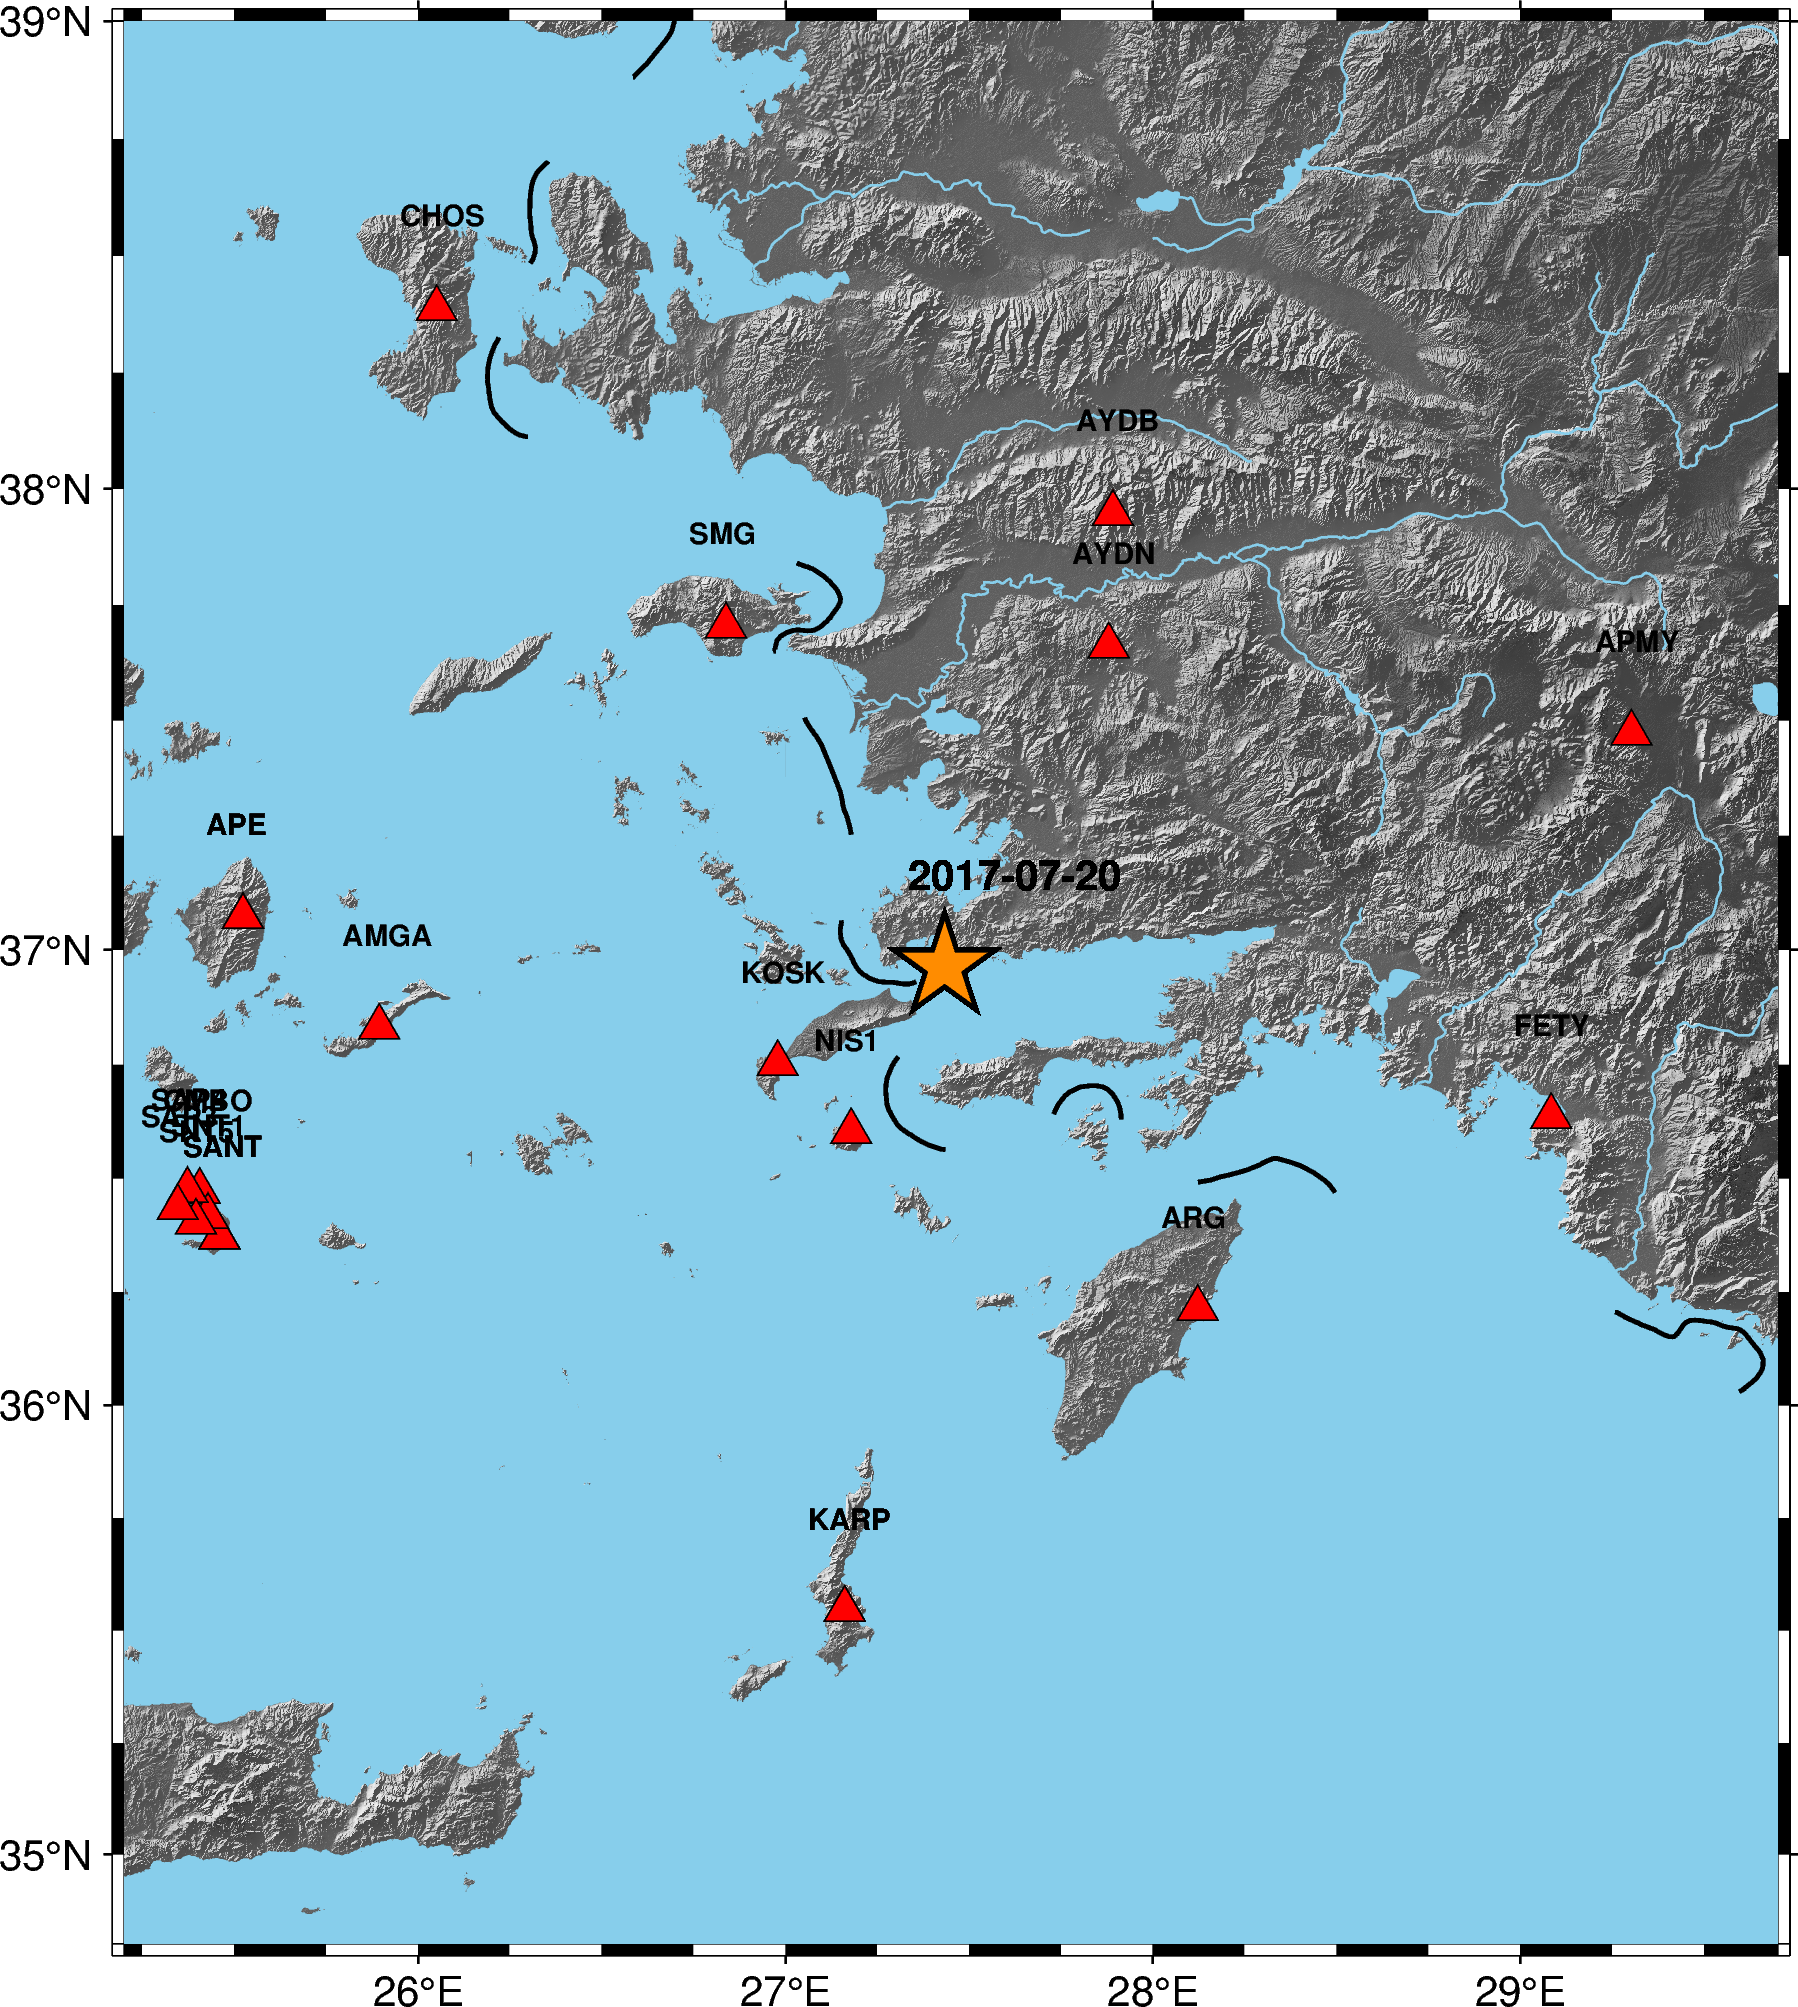

In [1]:
import pandas as pd
import pygmt
import os

# Seismic Stations
station = pd.read_csv("Station_catalog/Station_Info.csv")

minlat = 34.80  # N
maxlat = 39.00  # N
minlon = 25.20  # E
maxlon = 29.70  # E

# Visualization
fig = pygmt.Figure()

# Creating the Map
topo_data = '@earth_relief_03s'

fig.basemap(region=[minlon, maxlon, minlat, maxlat], projection="M14c", frame=True)
fig.grdimage(topo_data, cmap='grayC', shading=True)
fig.coast(rivers='a/0.5,skyblue', water='skyblue')
fig.coast(borders='1/1,black')

# Plotting Stations and Event Epicenter
fig.plot(x=station["st_lon"], y=station["st_lat"], style="t0.4c", color='red', 
         pen="black")
fig.plot(x=station["eq_lon"], y=station["eq_lat"], style="a0.9c", pen="1p,black", fill="darkorange")

# Adding station labels and event labels
for index, row in station.iterrows():
    fig.text(textfiles=None, x=row["st_lon"] - 0.1, y=row["st_lat"] + 0.2, position=None, text=row['station'],
             angle=0, font='7p,Helvetica-Bold,black', justify='LM')
    fig.text(textfiles=None, x=row["eq_lon"] - 0.1, y=row["eq_lat"] + 0.2, position=None, text=row['Event'],
             angle=0, font='10p,Helvetica-Bold,black', justify='LM')
    
# Specify the path  
save_path = "PyGMT_Map"
# Check if the directory exists, if not, create it
if not os.path.exists(save_path):
    os.makedirs(save_path)
# Save the figure to the specified path
fig.savefig("Stations_map.png", dpi=300, transparent=True)
# Move the saved figure to the desired directory
os.rename("Stations_map.png", os.path.join(save_path, "Stations_map.png"))

fig.show()

## Data Retrieval
Acquiring the seismograms or seismicity data from the selected stations is a critical step in our analysis. This data will serve as the foundation for our investigation into the characteristics of the 2017 Kos earthquake.

**Data Source:** We retrieved the seismic data from seismic networks and institutions that maintain real-time and historical seismological data. These sources provide continuous recordings of ground motion captured by seismometers.

**Data Format:** The seismic data is usually provided in standard formats, such as MiniSEED or SAC. These formats are compatible with various seismological software and libraries.

### Data Retrieval Process
The process involves querying the data repositories with station and time parameters to retrieve the relevant recordings. ObsPy, a Python library for seismology, proves to be invaluable for this task.

In [2]:
from obspy.clients.fdsn import RoutingClient
from obspy import UTCDateTime
import os
import matplotlib.pyplot as plt

# Define the start and end times for data retrieval
start_time = UTCDateTime("2017-07-20T22:31:11")
end_time = start_time + 10 * 60  # Retrieve data for 10 minutes after the event

# List of stations and networks to retrieve
stations_networks = [
    ("SAP3", "HL"),
    ("NIS1", "HT"),
    ("KOSK", "HC"),
    ("AYDN", "TU"),
    ("SMG", "HL"),
    ("ARG", "HL"),
    ("AYDB", "KO"),
    ("AMGA", "HL"),
    ("FETY", "KO"),
    ("KARP", "GE"),
    ("KARP", "HL"),
    ("APE", "GE"),
    ("APE", "HL"),
    ("APMY", "KO"),
    ("SANT", "GE"),
    ("SANT", "HL"),
    ("CMBO", "HT"),
    ("SNT1", "HA"),
    ("SAP4", "HL"),
    ("SNT5", "HA"),
    ("SAP3", "HL"),
    ("CHOS", "HT"),
]

# Initialize the FDSN routing client
client = RoutingClient("eida-routing")

# Create an empty stream to hold the waveforms
tr = client.get_waveforms(
    network=stations_networks[0][1],
    station=stations_networks[0][0],
    location="*",
    channel="HH*",
    starttime=start_time,
    endtime=end_time
)

# Retrieve and store waveforms for each station-network pair
for station, network in stations_networks:
    st = client.get_waveforms(
        network=network,
        station=station,
        location="*",
        channel="HH*",
        starttime=start_time,
        endtime=end_time
    )
    
    if len(st) == 0:
        continue
    
    # Append the waveforms to the existing stream
    tr += st

        # Save the waveform data to a file
    for trace in st:
        trace_name = trace.stats.station + "_" + trace.stats.location + "_" + \
                     start_time.strftime("%Y%m%d%H%M%S") + "_" + \
                     end_time.strftime("%Y%m%d%H%M%S") + "_" + trace.stats.channel
        filename = f"{network}_{trace_name}.mseed"
        path = "miniSEED"  # Customizing File Path
        os.makedirs(path, exist_ok=True)  # Ensure the directory exists
        path_out = os.path.join(path, filename)
        trace.write(path_out, format="MSEED")

        # Print the stream (optional)
        print(st)

3 Trace(s) in Stream:
HL.SAP3..HHE | 2017-07-20T22:31:09.750000Z - 2017-07-20T22:41:11.870000Z | 100.0 Hz, 60213 samples
HL.SAP3..HHN | 2017-07-20T22:31:08.550000Z - 2017-07-20T22:41:12.950000Z | 100.0 Hz, 60441 samples
HL.SAP3..HHZ | 2017-07-20T22:31:08.070000Z - 2017-07-20T22:41:11.430000Z | 100.0 Hz, 60337 samples
3 Trace(s) in Stream:
HL.SAP3..HHE | 2017-07-20T22:31:09.750000Z - 2017-07-20T22:41:11.870000Z | 100.0 Hz, 60213 samples
HL.SAP3..HHN | 2017-07-20T22:31:08.550000Z - 2017-07-20T22:41:12.950000Z | 100.0 Hz, 60441 samples
HL.SAP3..HHZ | 2017-07-20T22:31:08.070000Z - 2017-07-20T22:41:11.430000Z | 100.0 Hz, 60337 samples
3 Trace(s) in Stream:
HL.SAP3..HHE | 2017-07-20T22:31:09.750000Z - 2017-07-20T22:41:11.870000Z | 100.0 Hz, 60213 samples
HL.SAP3..HHN | 2017-07-20T22:31:08.550000Z - 2017-07-20T22:41:12.950000Z | 100.0 Hz, 60441 samples
HL.SAP3..HHZ | 2017-07-20T22:31:08.070000Z - 2017-07-20T22:41:11.430000Z | 100.0 Hz, 60337 samples
3 Trace(s) in Stream:
TU.AYDN..HHE | 2017-0

## Data Analysis

In this section, we will showcase plots and visualizations of the seismograms or seismicity data that we retrieved from the selected stations. Each plot serves a specific purpose and contributes to our understanding of the 2017 Kos earthquake.

### Seismograms and Ground Motion

#### Plot 1: Seismograms from Selected Stations
The following plot displays the seismograms captured by the selected stations for the 2017 Kos earthquake. Each seismogram shows the ground motion recorded at a specific station. I selected these stations because they are closer to the epicenter of the earthquake that occurred on July 20, 2017. Specifically, I chose stations NIS1 with network code HT, KOSK with network code HC, AYDN with network code TU, and SMG with network code HL. These stations are located at distances ranging from approximately 46 to 97 kilometers from the epicenter. This proximity allows us to gather valuable seismic data that can help in understanding the characteristics of the earthquake and its effects.

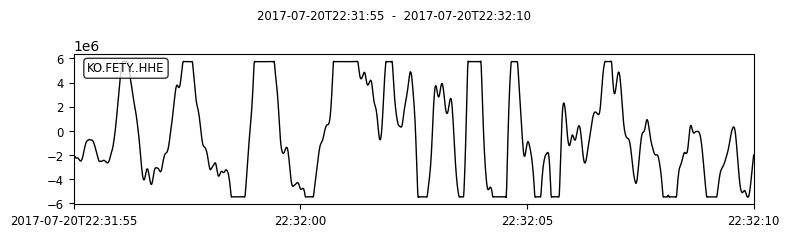

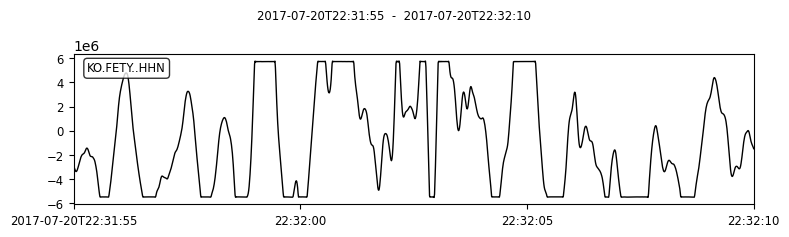

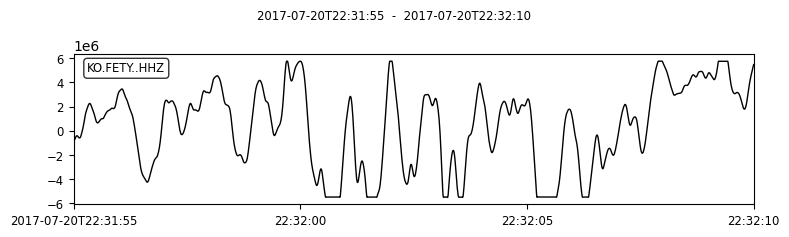

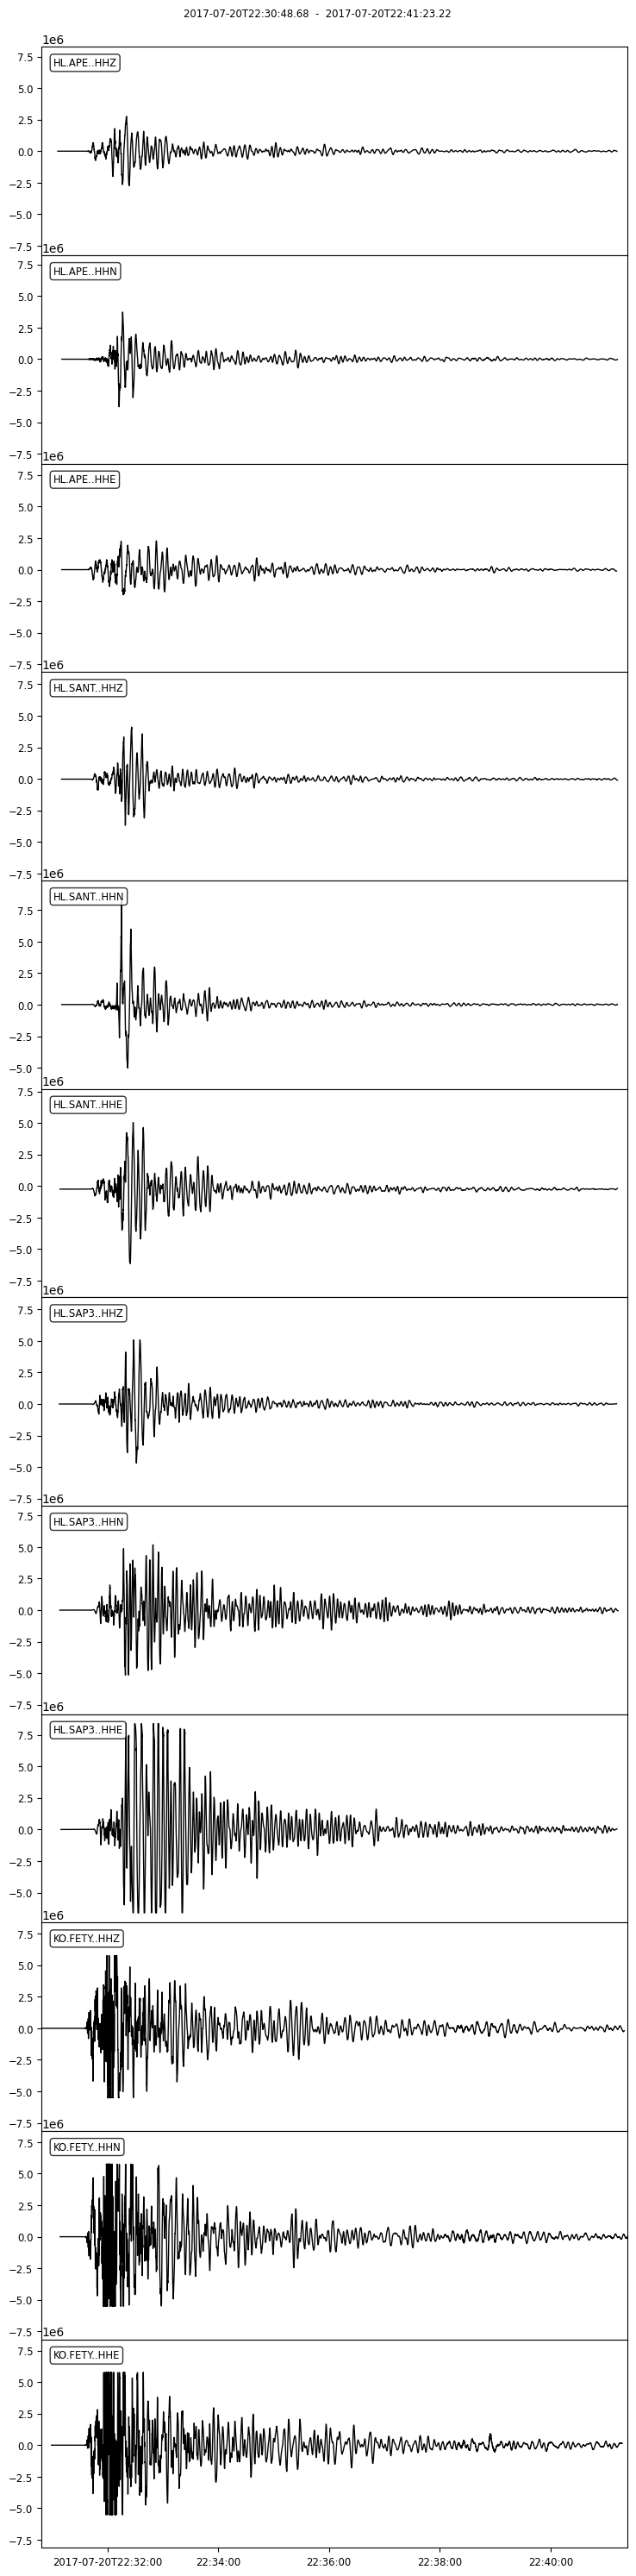

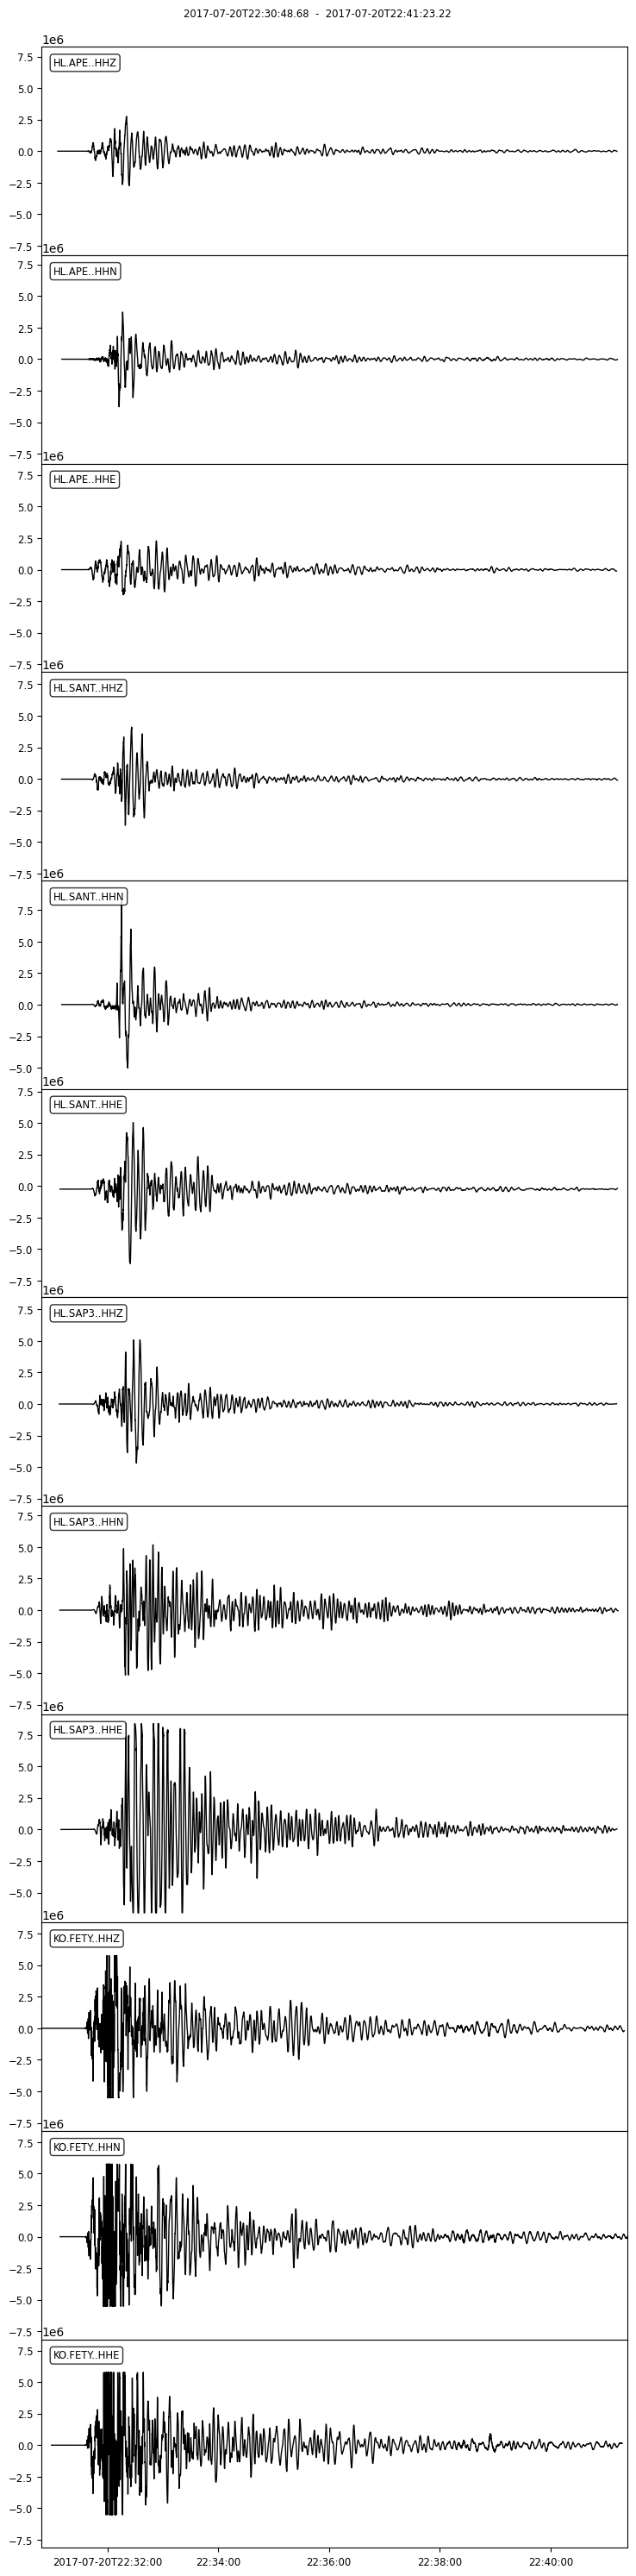

In [7]:
from obspy import read, Stream, UTCDateTime
import os
import matplotlib.pyplot as plt
import numpy as np

# Directory containing the downloaded MiniSEED files
mseeds_directory = "miniSEED/" ## Customizing File Path

# List of selected stations
selected_stations = ["HL_SANT", "HL_SAP3", "KO_FETY", "HL_APE"]

# Initialize an empty stream to hold the waveforms
st = Stream()

# Read and append waveforms from selected stations
for station_code in selected_stations:
    file_pattern = f"{station_code}__*.mseed"
    file_paths = [os.path.join(mseeds_directory, file) for file in os.listdir(mseeds_directory) if file.endswith('.mseed') and station_code in file]
    for file_path in file_paths:
        st += read(file_path)

#-------------------------SATURATION PROJECTION ON THE SEISMOGRAPH-------------------------#
# Define the start and end times for data retrieval to show the saturation, (Uncomment the following)
# Trace path for the three components
trace_path_hhe = "miniSEED/KO_FETY__20170720223111_20170720224111_HHE.mseed"
trace_path_hhn = "miniSEED/KO_FETY__20170720223111_20170720224111_HHN.mseed"
trace_path_hhz = "miniSEED/KO_FETY__20170720223111_20170720224111_HHZ.mseed"
# Read the trace data for the three components using ObsPy
st_hhe = read(trace_path_hhe)
st_hhn = read(trace_path_hhn)
st_hhz = read(trace_path_hhz)
# Set the start and end times for the plot
start_time_1 = UTCDateTime("2017-07-20T22:31:55")
end_time_2 = start_time_1 + 15
# Plot the waveforms for each component with the specified x-axis limits
st_hhe.plot(starttime=start_time_1, endtime=end_time_2)
st_hhn.plot(starttime=start_time_1, endtime=end_time_2)
st_hhz.plot(starttime=start_time_1, endtime=end_time_2)
#-------------------------SATURATION PROJECTION ON THE SEISMOGRAPH-------------------------#

# Plot the waveforms. (Comment when you run the above plot)
st.plot()

### Conclusions and Discussion for Plot 1

When performing seismic data analysis using the HL_SANT, HL_SAP3 and HL_APE seismometers, the identification of P (primary) and S (secondary) waves becomes a simple task. These seismometers, known for their sensitivity and accuracy, offer an ideal platform for the detection and characterization of seismic waves.

The specific response characteristics of these instruments, combined with their wide frequency range, allow researchers and seismologists to distinguish the arrival times and waveforms of P and S waves accurately and clearly. This ability is crucial for understanding the nature of seismic events, as the arrival times of these waves provide valuable information about the location and depth of the earthquake.

In addition, it is worth noting that the STS-2 seismometer, with its sensitivity of 1500 V*s/m (or 20000 V*s/m in High Gain mode) and its special transfer function characteristics, plays an important role in enhancing the accuracy of seismic wave detection alongside the HL_SANT and HL_APE seismometers.

In addition, the inclusion of the HL_SAP3 station with the LE-3D/20s high performance 0.05 Hz seismometer complements the seismic monitoring capabilities of the array. With its specialized sensitivity and frequency response, the LE-3D/20s provides valuable data for the detection and analysis of low-frequency seismic events, offering a comprehensive understanding of seismic activity over a wide range.

Furthermore, in the case of the KO_FETY seismometer, which uses the Güralp 3ESP Response with options ranging from 120 s to 50 Hz (including the standard 30 s - 50 Hz settings), it is important to note that while it offers a wide frequency range, it can occasionally experience saturation in high intensity seismic events.

Saturation occurs when the recorded seismic signal reaches the upper limit of the instrument's measurement capability, resulting in a flattened waveform. While this saturation can limit the detailed analysis of high intensity seismic events, it also serves as an indicator of the significant magnitude of the event.

In summary, the combination of HL_SANT and HL_APE, and HL_SAP3 STS-2 and LE-3D/20s stations respectively, each with unique sensitivities and frequency response characteristics, facilitates accurate detection of P and S waves, contributing to a comprehensive understanding of seismic events over a wide range of frequencies. Researchers should be aware of potential saturation issues with the KO_FETY seismometer when dealing with extremely intense seismic events, as it can provide valuable information on the magnitude and energy release of the event.

#### Plot 2: Amplitude Spectrum from Selected Stations

The following code reads raw seismic data from selected stations during the 2017 Kos earthquake and generates amplitude spectrum plots for each station. The amplitude spectrum provides insights into the frequency content and intensity of the seismic waves recorded at each station.

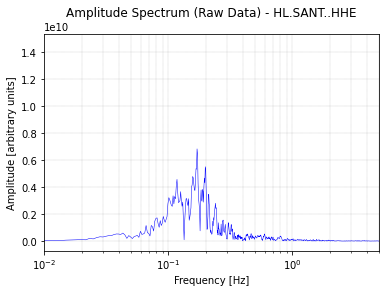

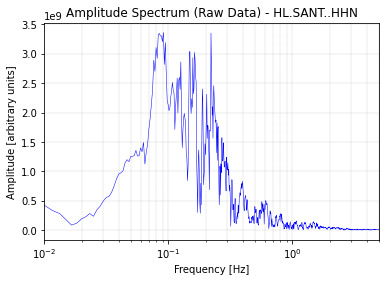

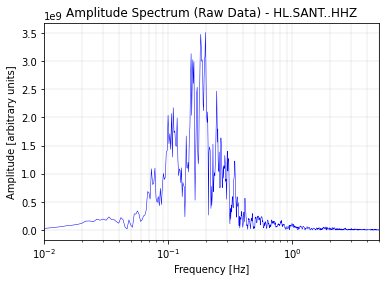

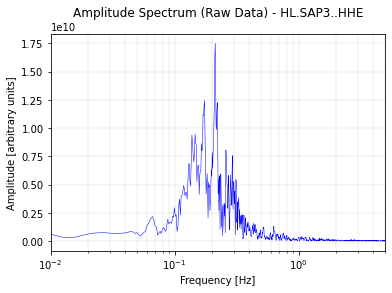

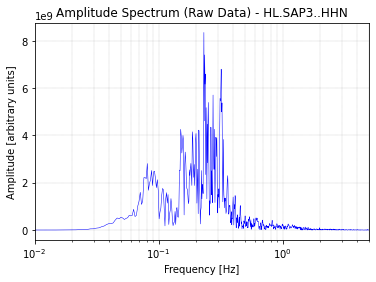

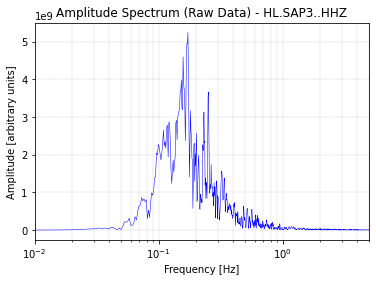

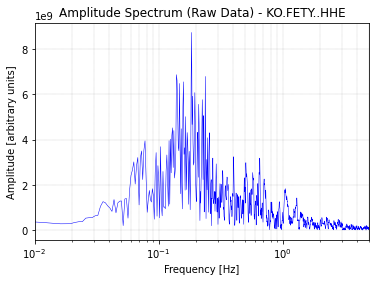

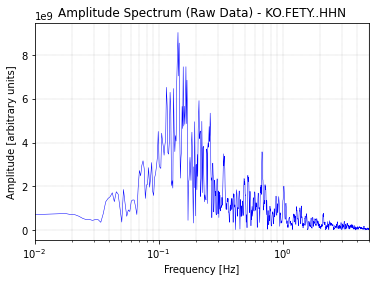

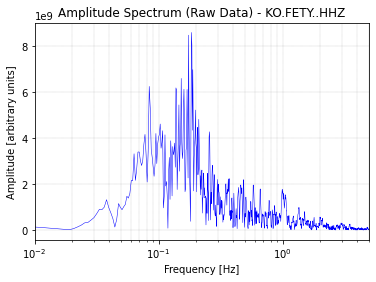

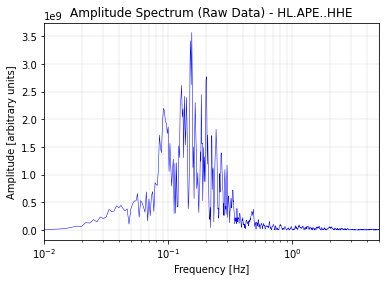

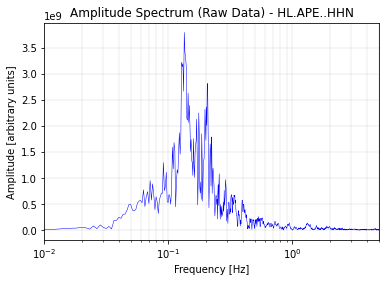

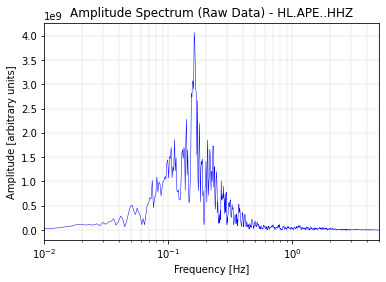

In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
from obspy import read, Stream, UTCDateTime

# Directory containing the downloaded MiniSEED files
mseeds_directory = "miniSEED/" ## Customizing File Path

# List of selected stations
selected_stations = ["HL_SANT", "HL_SAP3", "KO_FETY", "HL_APE"]

# Initialize an empty stream to hold the waveforms
st = Stream()

# Read and append waveforms from selected stations
for station_code in selected_stations:
    file_pattern = f"{station_code}__*.mseed"
    file_paths = [os.path.join(mseeds_directory, file) for file in os.listdir(mseeds_directory) if file.endswith('.mseed') and station_code in file]
    for file_path in file_paths:
        st += read(file_path)

# Compute the FFT (Fast Fourier Transform) of the seismic data
for tr in st:
    D = np.fft.rfft(tr.data)

    # Calculate the corresponding frequency values
    freqs = np.fft.rfftfreq(tr.stats.npts, d=tr.stats.delta)

    # Plot the amplitude spectrum
    plt.plot(freqs, np.abs(D), color=(0, 0, 1), linewidth=0.5)

    # Set the x-axis to a logarithmic scale
    plt.xscale("log")

    # Limit the x-axis range to frequencies between 0.01 Hz and 5 Hz
    plt.xlim(0.01, 5)

    # Label the x and y axes
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Amplitude [arbitrary units]")

    # Add the current station information to the list
    station_network = tr.stats.network
    station_name = tr.stats.station
    station_channel = tr.stats.channel
    
# Add a title to the plot with all selected station names
    plt.title(f"Amplitude Spectrum (Raw Data) - {station_network}.{station_name}..{station_channel}")

# Add gridlines with black dashed lines
    plt.grid(color='black', which='both', linestyle='--', linewidth=0.1)

# Display the plot
    plt.show()


### Conclusions and Discussion for Plot 2

In our analysis of the amplitude spectrum from the raw seismic data, several intriguing patterns have emerged across multiple seismic channels. Notably, the HL.SANT station has exhibited a substantial amplitude of 0.7 arbitrary units within the frequency range of 10^-1 to 10^0 on its HHE channel. Equally noteworthy is that the HL.SANT station, when assessing its HHN and HHZ channels, has displayed high-intensity amplitudes of 3.2 and 3.5 arbitrary units, respectively, within the same frequency range.

Upon closer examination, it becomes evident that the HL.SAP3 station reveals a remarkable amplitude of 1.75 arbitrary units on its HHE channel and a considerable intensity of 8 arbitrary units on its HHN channel within the frequency band of 10^-1 to 10^0 . Concurrently, its HHZ channel records a substantial amplitude of 5.5 arbitrary units within the identical frequency range.

Additionally, the HL.FETY station demonstrates a remarkable consistency among its channels, with each one—HHE, HHN, and HHZ—exhibiting high-intensity amplitudes of 8.5 arbitrary units within the frequency range of 10^-1 to 10^0.

Finally, the HL.APE station offers noteworthy insights, with its HHE channel displaying an amplitude of 3.6 arbitrary units and its HHN channel mirroring this value within the 10^-1 to 10^0 frequency range. Notably, the HHZ channel of HL.APE registers a slightly higher intensity, measuring 4 arbitrary units within the same frequency span.

These findings illuminate the seismic characteristics within the recorded data, accentuating the variability in intensity across distinct seismic channels. It is imperative to contextualize these observations within the broader landscape of seismic analysis and interpretation.

From our perspective, these fluctuations in amplitude intensity may hold key implications, potentially indicating diverse geological features or subsurface structures influencing the recorded seismic signals. Delving deeper into this phenomenon and correlating it with geological data could yield valuable insights, enhancing our understanding of these observations and their geological significance.

### Interpretation

In this section, we present multiple spectrograms that illustrate our findings based on the analysis of the seismic data from the selected stations. Each spectrogram serves as visual evidence of different aspects of the 2017 Kos earthquake. We also provide justifications for the interpretations drawn from these spectrograms, linking them to the seismic characteristics and geological conditions of the region.

#### Plot 3: Spectrograms from Selected Stations

The following plots display the spectrograms generated from the seismic data captured by the selected stations during the 2017 Kos earthquake. These spectrograms reveal variations in frequency content and intensity, providing insights into the seismic waves' behavior and characteristics.


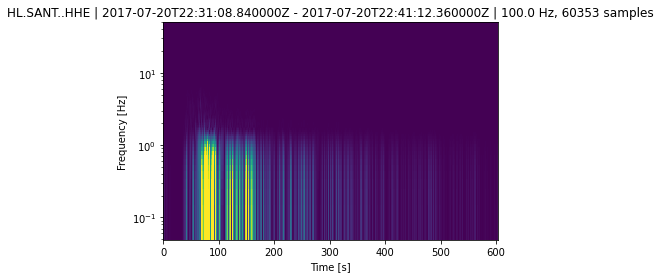

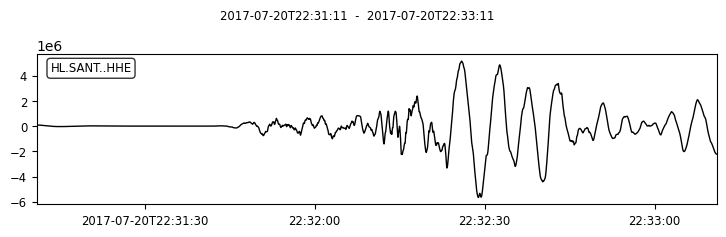

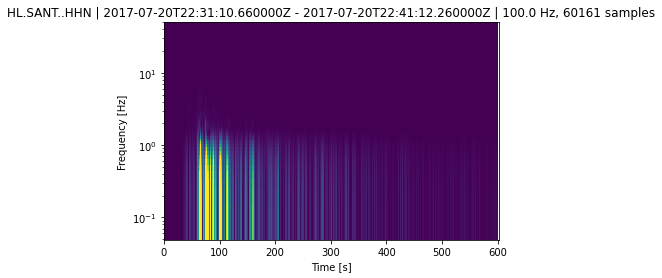

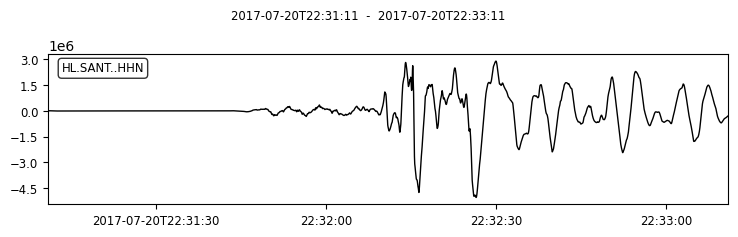

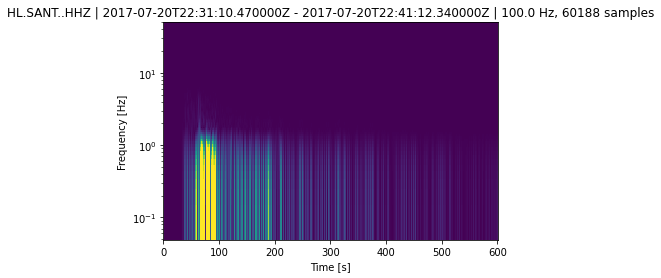

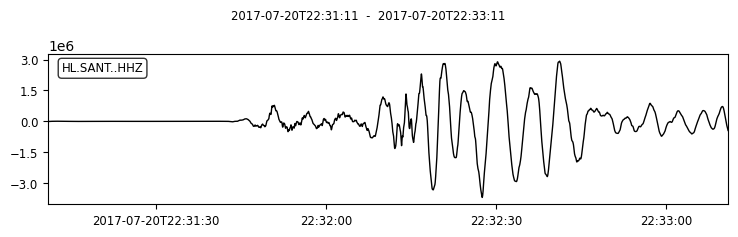

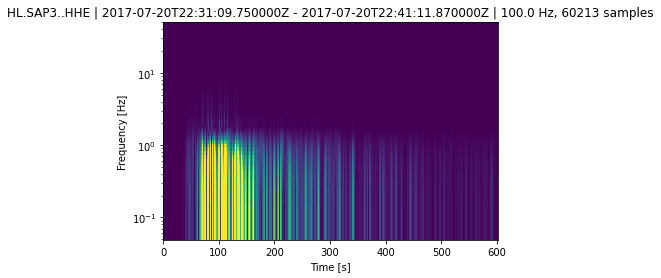

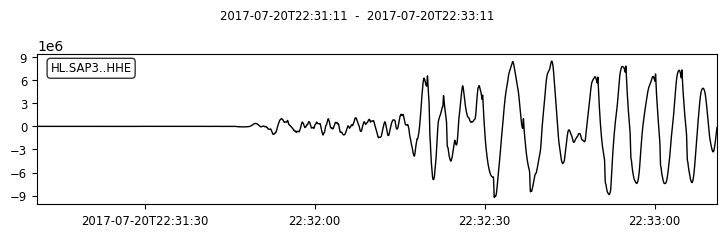

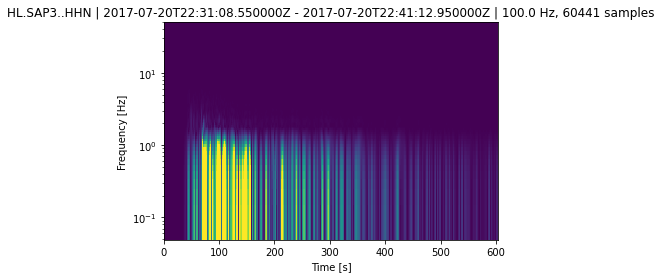

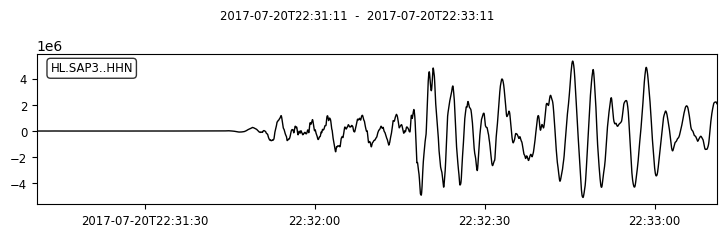

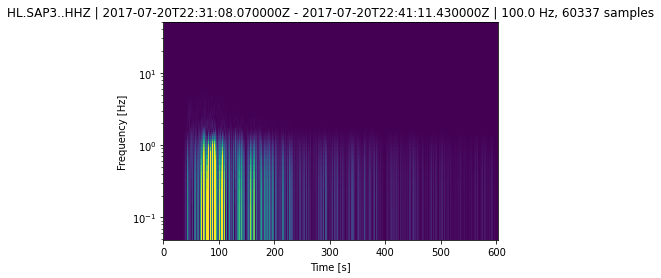

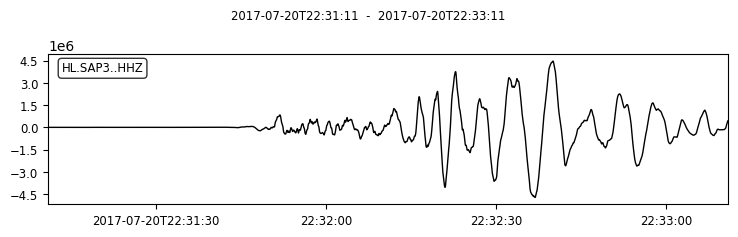

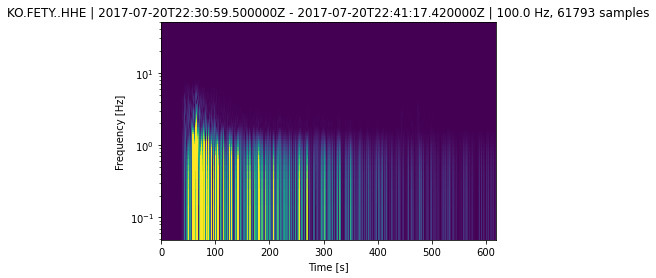

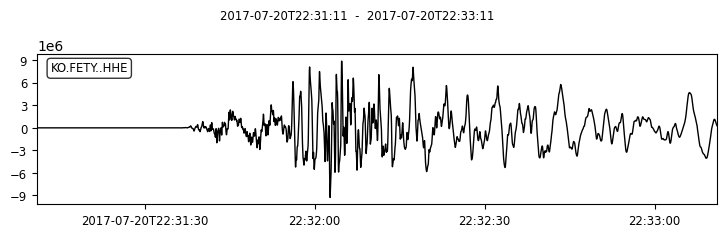

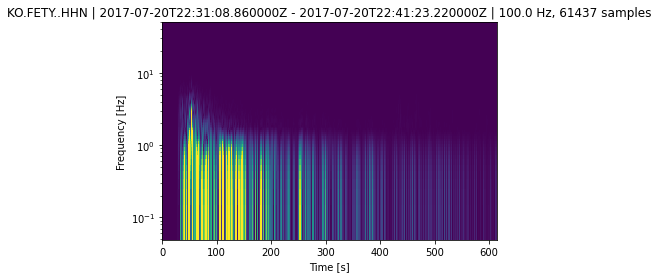

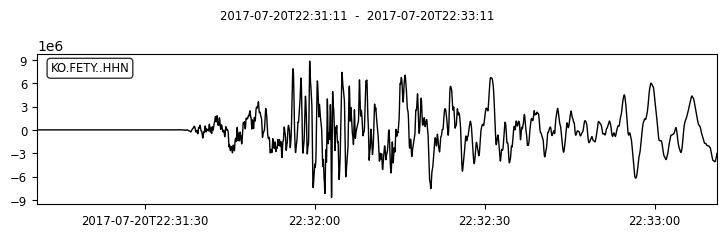

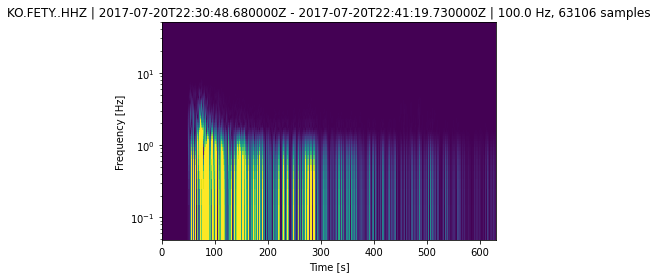

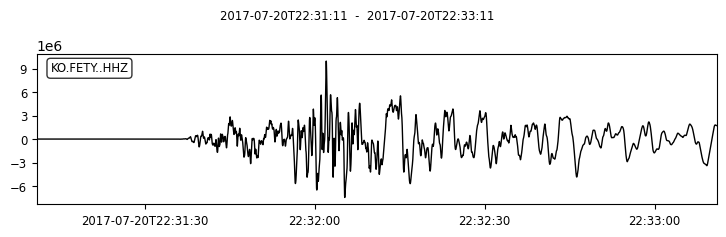

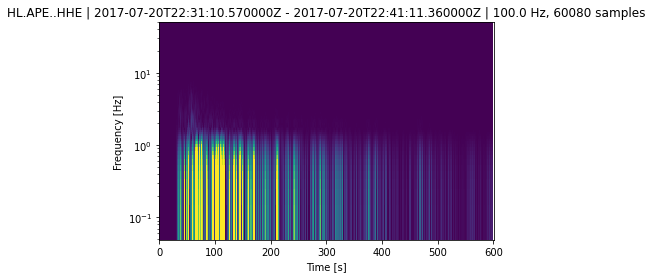

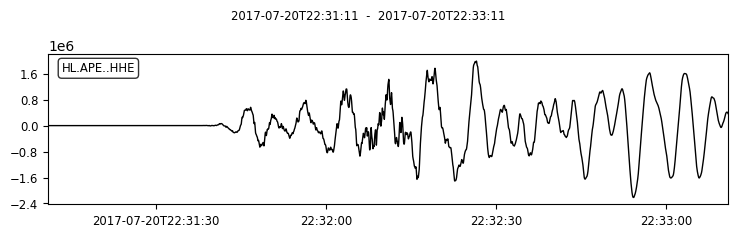

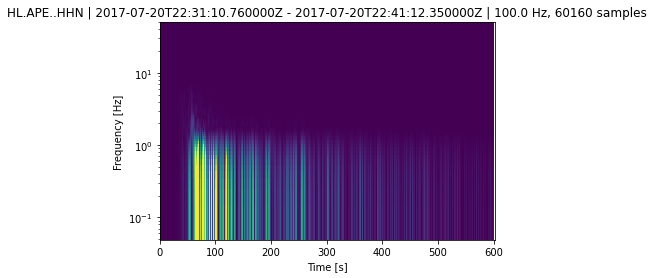

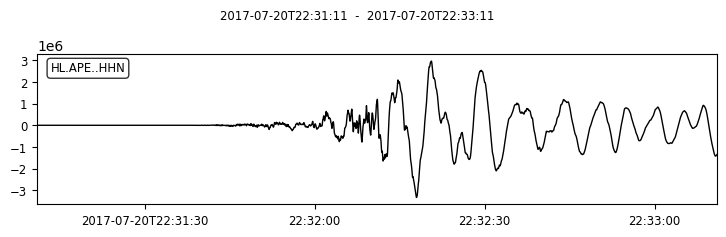

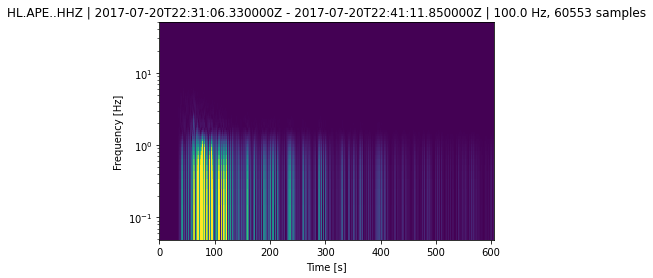

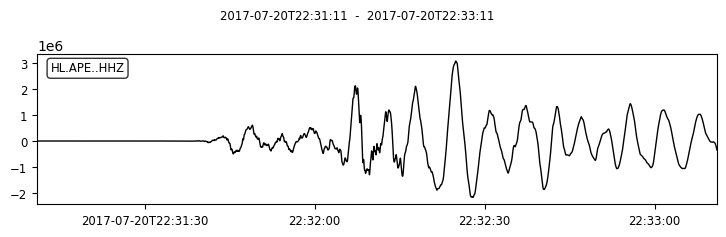

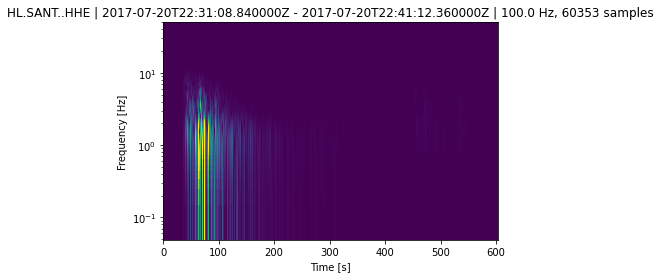

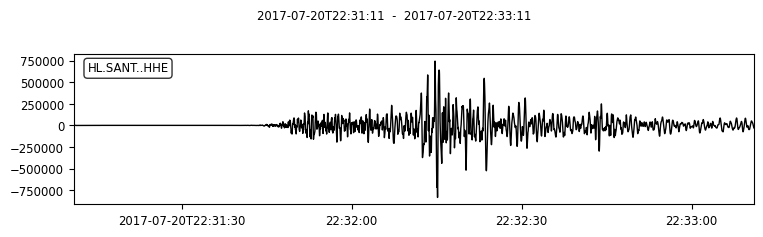

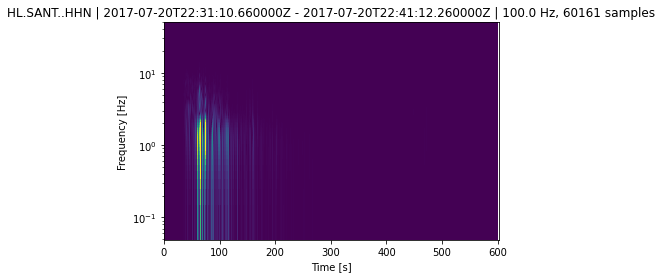

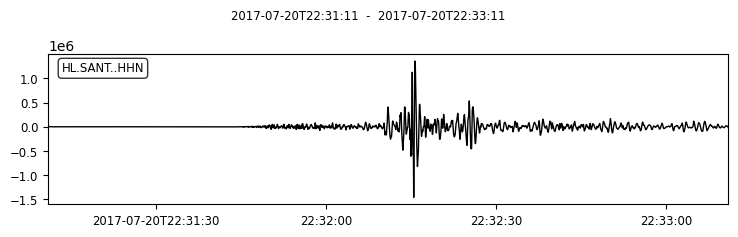

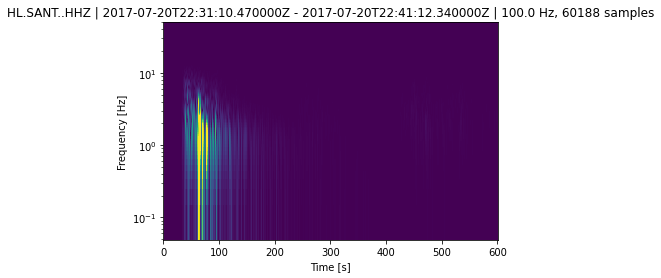

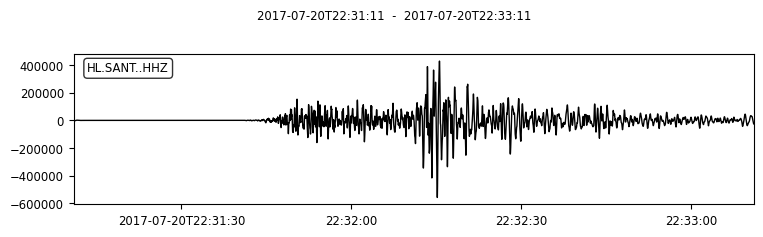

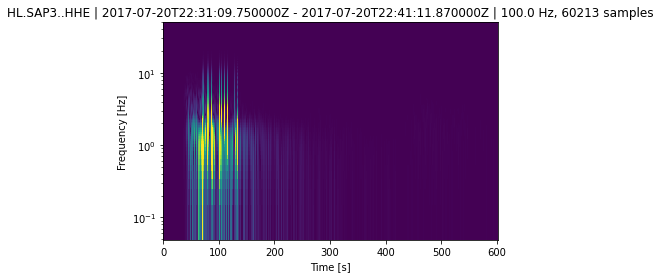

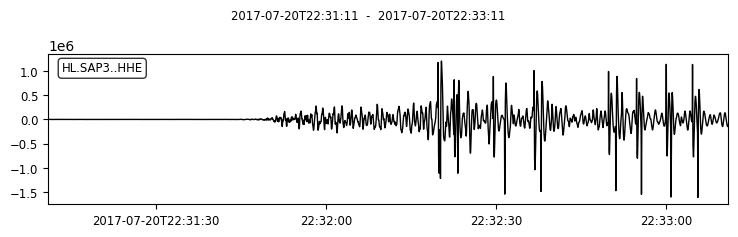

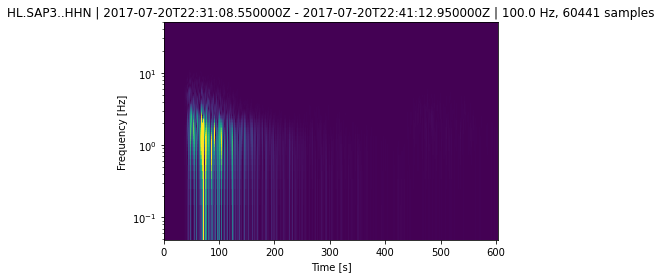

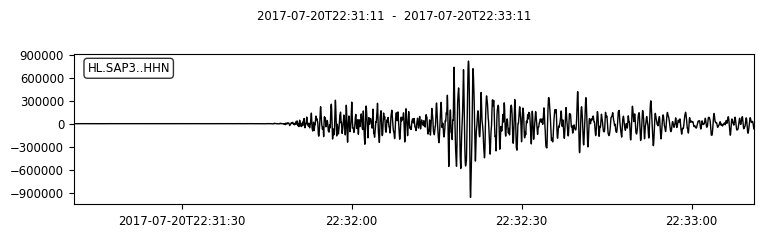

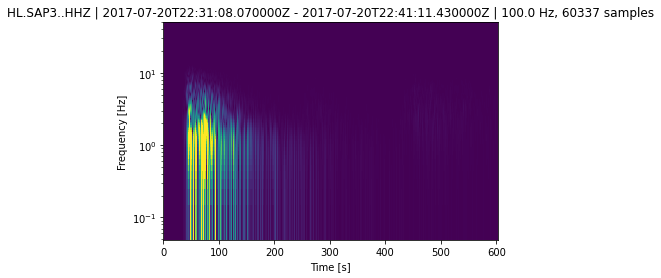

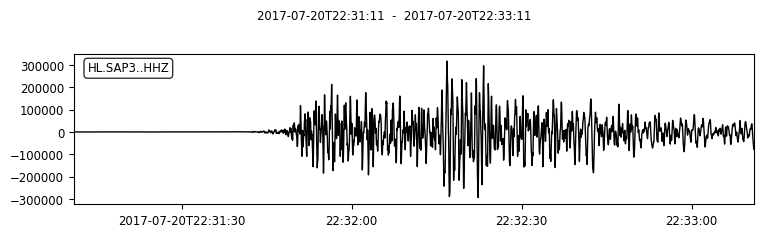

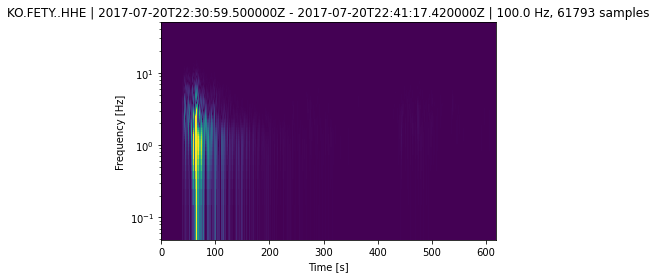

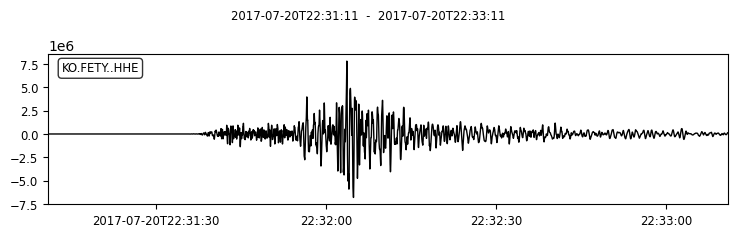

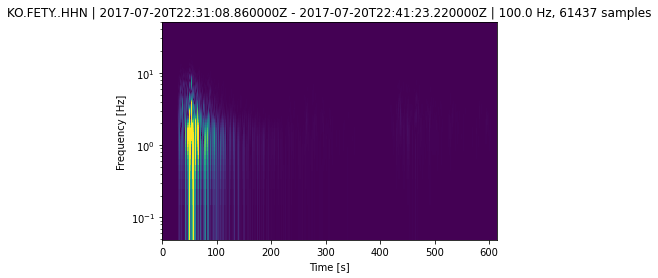

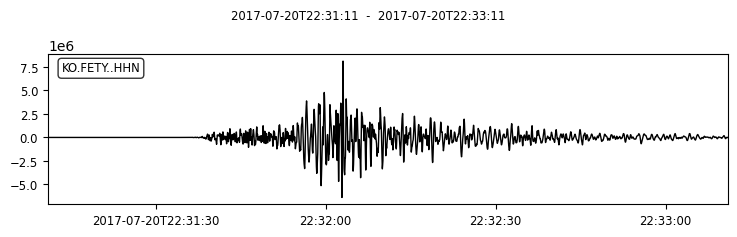

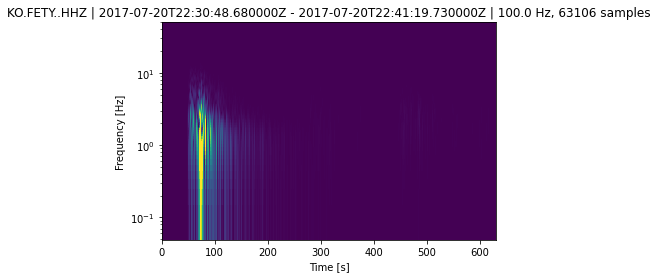

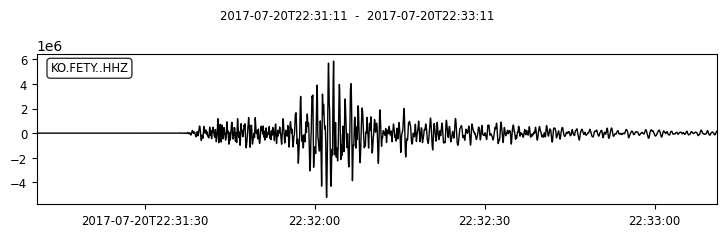

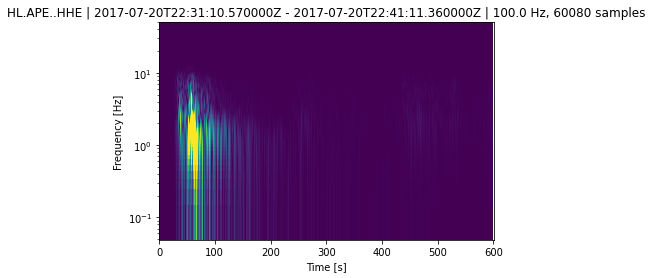

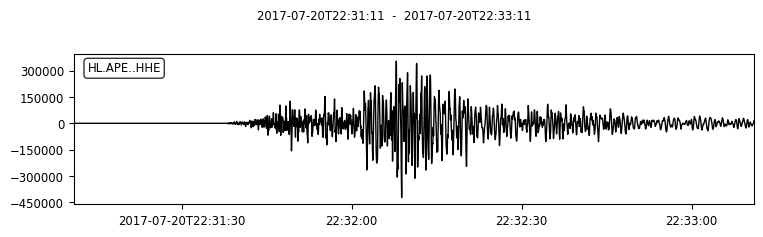

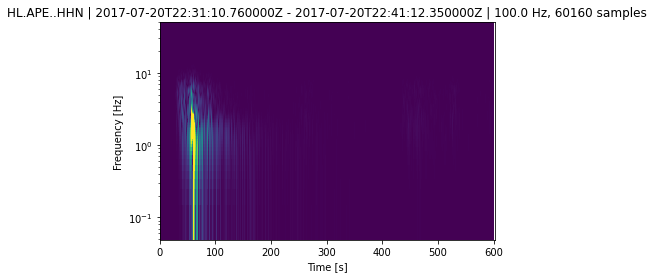

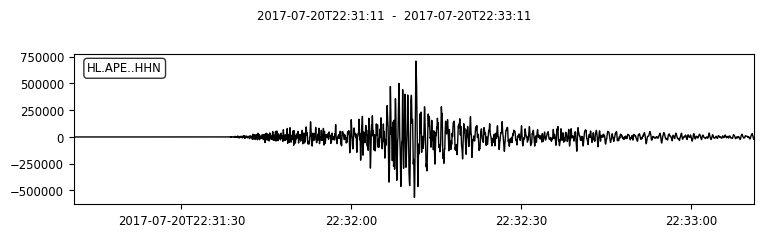

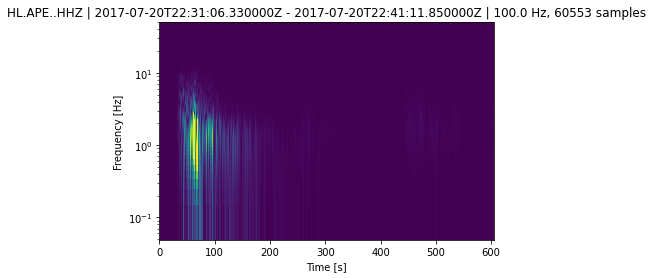

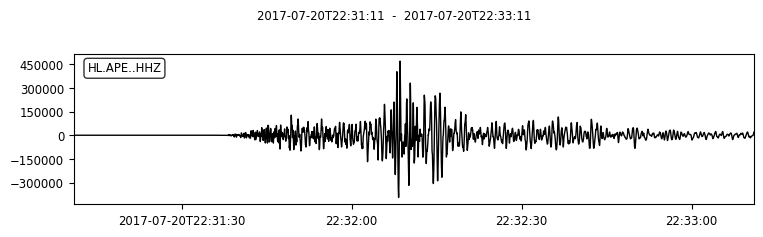

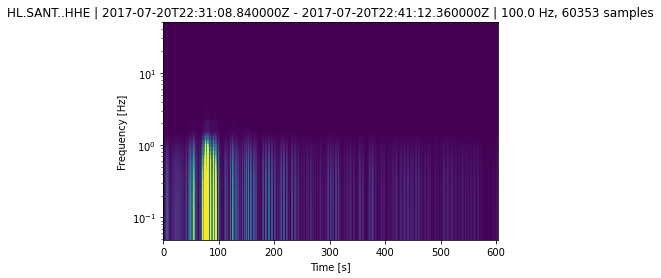

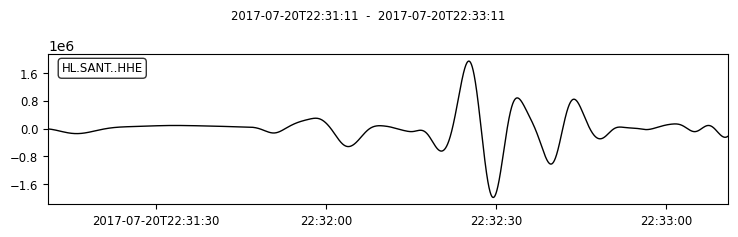

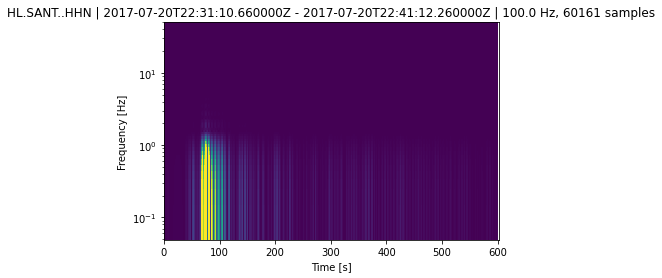

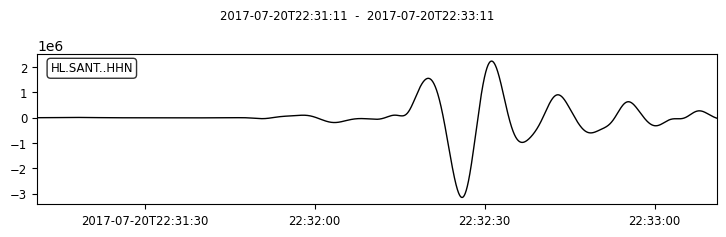

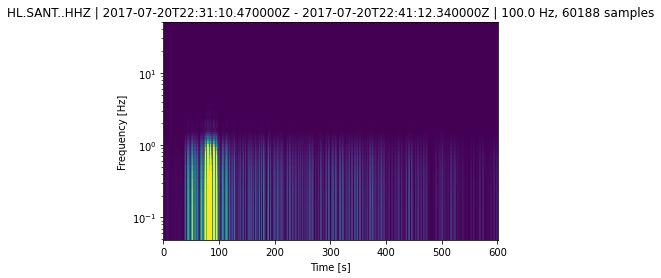

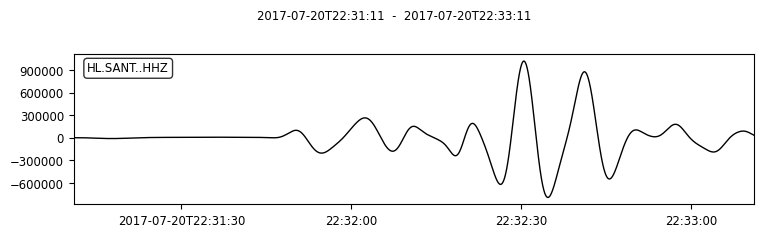

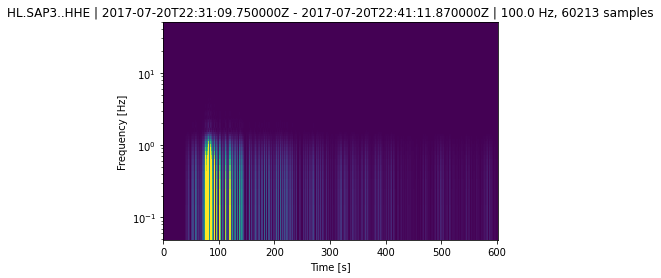

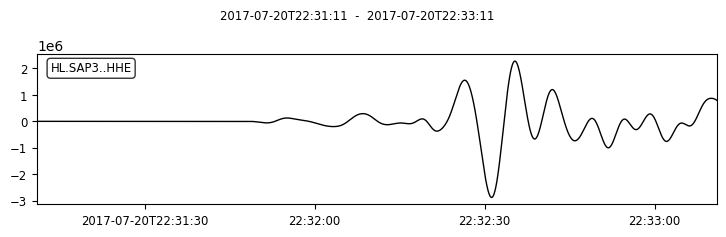

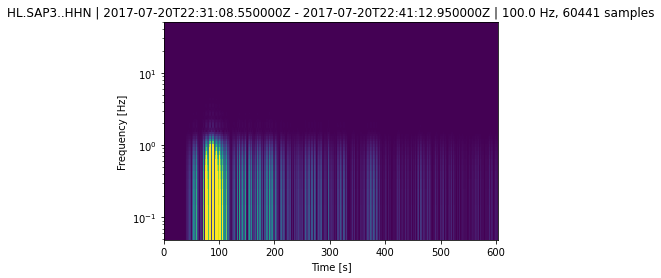

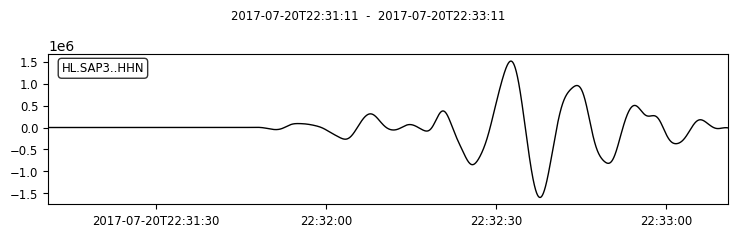

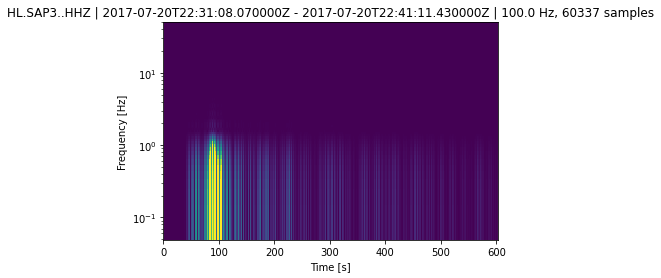

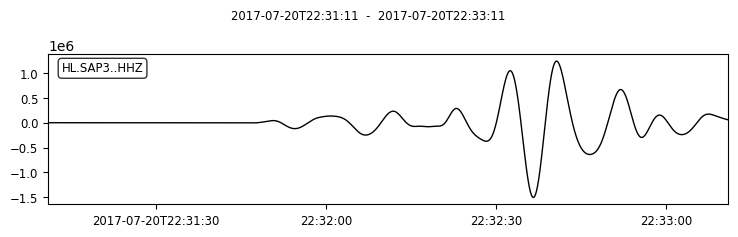

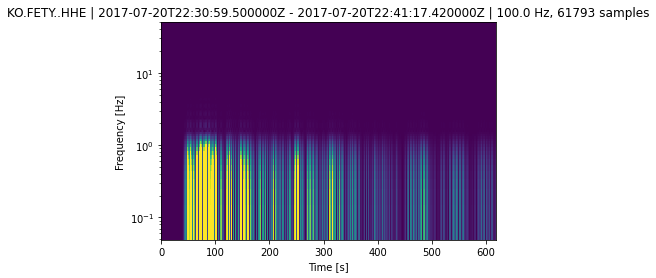

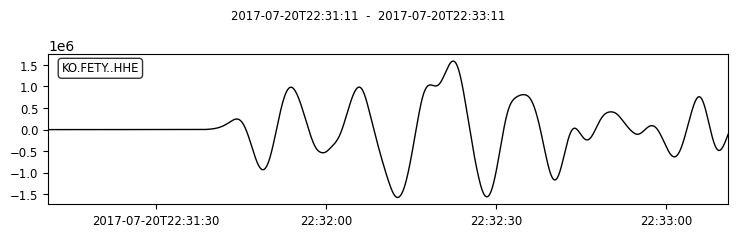

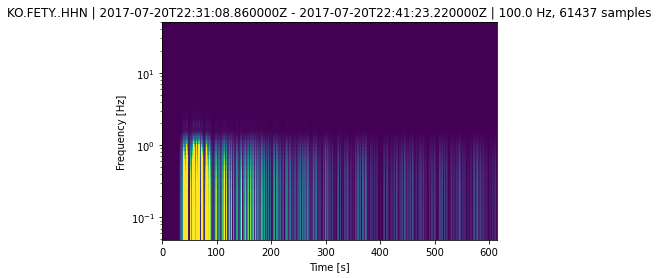

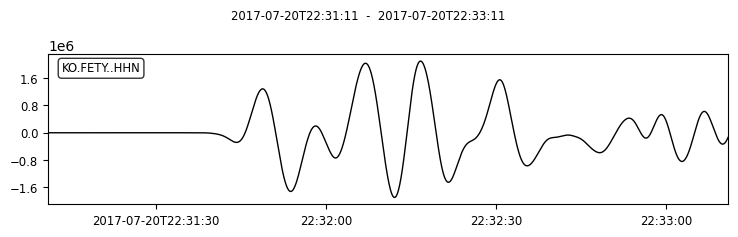

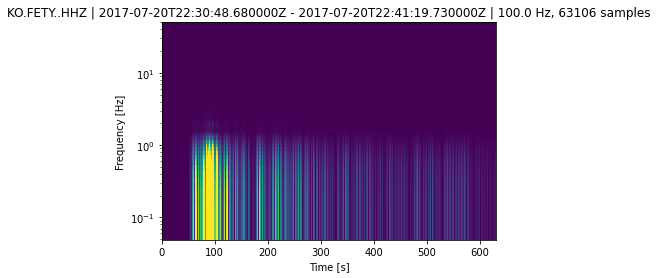

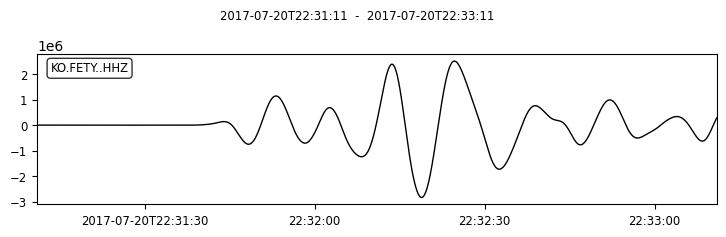

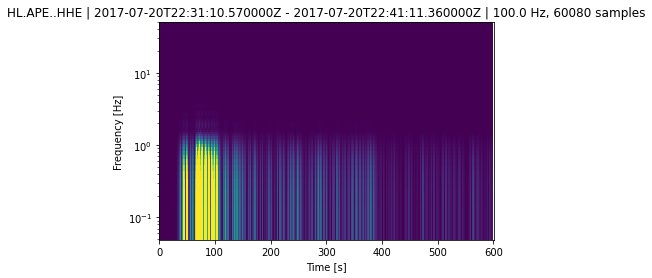

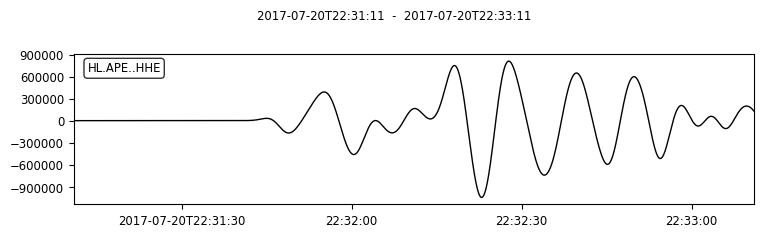

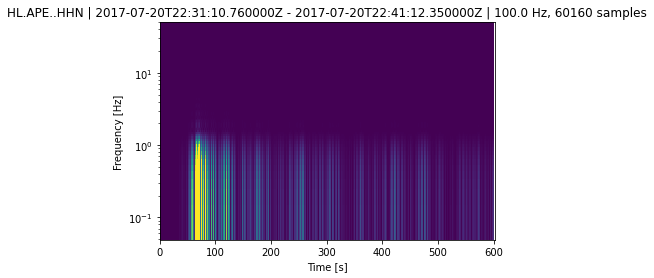

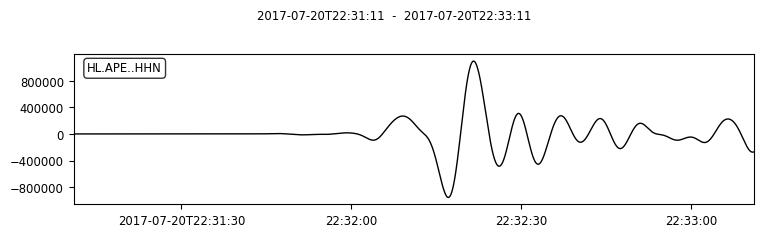

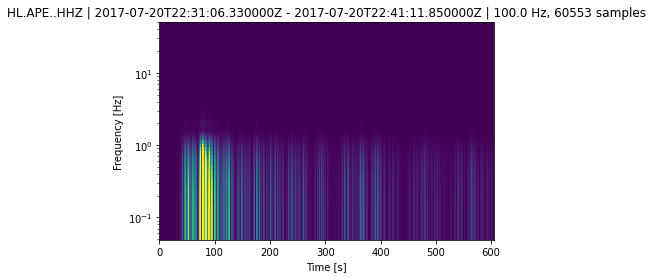

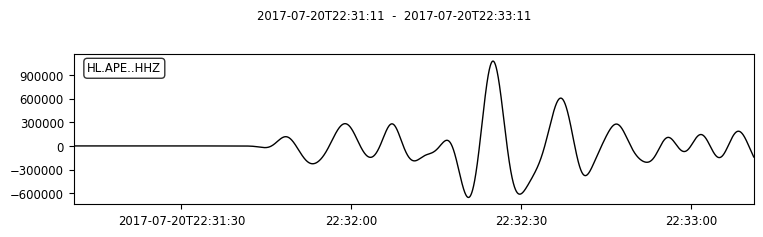

In [9]:
from obspy import read, Stream, UTCDateTime
import os
import matplotlib.pyplot as plt

# Directory containing the downloaded MiniSEED files
mseeds_directory = "miniSEED/" ## Customizing File Path

# List of selected stations
selected_stations = ["HL_SANT", "HL_SAP3", "KO_FETY", "HL_APE"]

# Initialize an empty stream to hold the waveforms
st = Stream()
st1 = Stream()
st2 = Stream(
)

# Read and append waveforms from selected stations
for station_code in selected_stations:
    file_pattern = f"{station_code}__*.mseed"
    file_paths = [os.path.join(mseeds_directory, file) for file in os.listdir(mseeds_directory) if file.endswith('.mseed') and station_code in file]
    for file_path in file_paths:
        st += read(file_path)
        st1 += read(file_path)
        st2 += read(file_path)

# Apply any necessary filters
st.filter("bandpass", freqmin=0.1, freqmax=4.95)  # Example bandpass filter from 1 to 4.95 Hz
st1.filter("bandpass", freqmin=1, freqmax=10.0)  # Example bandpass filter from 1 to 10 Hz
st2.filter("bandpass", freqmin=0.01, freqmax=0.1)  # Example bandpass filter from 0.01 to 0.1 Hz

# Plot the spectrograms
for tr in st:
    tr.spectrogram(clip=[0.0, 0.3], log=True)  # Plot spectrogram in logarithmic scale

    start_time = UTCDateTime("2017-07-20T22:31:11")
    end_time = start_time + 2 * 60 # Retrieve data for 2 minutes after the event

    # Plot the waveforms with the specified x-axis limits
    tr.plot(starttime=start_time, endtime=end_time)

# Plot the spectrograms
for tr in st1:
    tr.spectrogram(clip=[0.0, 0.3], log=True)  # Plot spectrogram in logarithmic scale

    start_time = UTCDateTime("2017-07-20T22:31:11")
    end_time = start_time + 2 * 60 # Retrieve data for 2 minutes after the event

    # Plot the waveforms with the specified x-axis limits
    tr.plot(starttime=start_time, endtime=end_time)

# Plot the spectrograms
for tr in st2:
    tr.spectrogram(clip=[0.0, 0.3], log=True)  # Plot spectrogram in logarithmic scale

    start_time = UTCDateTime("2017-07-20T22:31:11")
    end_time = start_time + 2 * 60 # Retrieve data for 2 minutes after the event

    # Plot the waveforms with the specified x-axis limits
    tr.plot(starttime=start_time, endtime=end_time)

### Conclusions and Discussion for Plot 3

When we applied these bandpass filters to the raw seismic data and then plotted the spectrograms, we observed variations in the frequency content and intensity of the signals in different frequency ranges. Each of these bandpass filters is designed to isolate specific frequency bands of interest while attenuating signals outside those bands.

1. **Bandpass Filter (0.1 to 4.95 Hz):**
     - This filter emphasized seismic signals within the frequency range from 0.1 to 4.95 Hz.
     - The resulting spectrogram emphasized seismic activity within this intermediate frequency band.
     - Reveal features such as body waves, surface waves and possible noise sources within this range.

2. **Bandpass Filter (1 to 10 Hz):**
     - This filter isolated the seismic signals in a slightly higher frequency range, from 1 to 10 Hz.
     - The corresponding spectrogram highlighted higher frequency seismic events and highlighted more localized or shallow seismic activity.
     - It provided information on the presence of other high frequency seismic phenomena.

3. **Bandpass Filter (0.01 to 0.1 Hz):**
     - Instead, this filter focused on very low frequency seismic signals, covering the range from 0.01 to 0.1 Hz.
     - The resulting spectrogram emphasized long-period seismic waves and revealed signals related to geological processes at depth.
     - It will proved particularly useful for the study of tectonic plate movements, the characterization of the focal mechanism, the average durations and rate of fault rupture.

### Insights and Questions

In this section, we summarize the key insights gained from our analysis of the seismic data and highlight any new questions that have arisen as a result. Through our analysis, we have been able to uncover important details about the 2017 Kos earthquake and its characteristics.

#### Key Insights

1. **Seismic Activity Patterns**: The seismograms and spectrograms from the selected stations have provided us with a clearer understanding of the seismic activity patterns during the earthquake. We observed variations in amplitude, frequency content, and duration of seismic waves, which can be attributed to factors like wave propagation and source characteristics.

2. **Seismicity and Magnitude**: The frequency-magnitude distribution has shed light on the seismicity of the region, showing the distribution of earthquake magnitudes. This distribution helps us assess the overall seismic hazard and the likelihood of future events.

#### New Questions

1. **Source Mechanism**: While we have gained insights into the earthquake's source and wave behavior, we may have new questions about the specific source mechanism that triggered the event. Further analysis could help us determine whether it was caused by faulting, subduction, or other geological processes.

2. **Wave Propagation**: The cross-sections have revealed how seismic waves propagated through the Earth's crust, indicating variations in travel times and velocities. These findings contribute to our understanding of the earthquake's source and the geological structures that influenced wave propagation.

3. **Local Effects**: The variations in seismograms and spectrograms suggest possible local effects that influenced ground motion at different stations. Exploring factors such as local geology and site conditions could help us understand these variations better.

4. **Aftershocks and Sequence**: The seismicity patterns in the region could raise questions about potential aftershocks and the overall seismic sequence. Are there indications of a larger seismic sequence? Are the recorded aftershocks consistent with our understanding of earthquake behavior?

### Summary

Our analysis has provided valuable insights into the seismic characteristics of the 2017 Kos earthquake. While we've addressed some questions, new ones have emerged, urging further investigation. By pursuing these questions, we can continue to deepen our understanding of seismic events and contribute to enhancing seismic hazard assessment and preparedness.


#### Reference & Python Libraries

USGS. "M 6.6 - 11 km ENE of Kos, Greece." Earthquake Event Page. U.S. Geological Survey, 2017.
https://earthquake.usgs.gov/earthquakes/eventpage/us20009ynd/region-info

The analysis heavily relied on the following Python libraries:

- `ObsPy`: Used for retrieving seismic data, processing waveforms, and generating plots.
- `matplotlib`: Utilized for creating various visualizations and plots.
- `pandas`: Employed for handling and processing tabular data.
- `geopy`: Used for geospatial calculations and distance calculations.
- `pygmt`: Utilized for generating geospatial maps and plots.
- `datetime`: Imported for working with date and time objects.
- `plotly.express`: Imported as `px` for creating interactive data visualizations.
- `os`: Imported for interacting with the operating system.

These libraries played a crucial role in conducting the seismic data analysis and generating the necessary visualizations and plots.

# Clean-up and Annotations

## Introduction
In this section, the primary objective was to enhance the readability and clarity of the Jupyter Notebook. This was achieved through several key steps, as outlined below.

### Code Organization and Commenting
- The code has been meticulously organized into well-structured sections, each with a distinct purpose.
- Each code block has been appropriately labeled, and informative comments have been added to elucidate the logic and functionality behind the code.
- This strategic organization facilitates easy navigation within the notebook and provides a clear understanding of the analysis flow.

### Markdown Annotations
- Markdown annotations have been thoughtfully incorporated throughout the notebook to provide essential context and explanations for every step of the analysis.
- These annotations highlight significant insights, detail data transformations, and clarify the purpose behind each visualization.
- The aim is to make it simpler for readers to follow the narrative of the analysis.

### Plot Annotations
- In the visualization sections, annotations have been introduced directly on the plots.
- These annotations offer additional insights into specific features, trends, or observations within the visualizations.
- The intention is to aid readers in interpreting the plots effectively and comprehending the significance of various patterns.

### Improving Readability
- Readability in the code has been prioritized by selecting descriptive variable and function names and adhering to established best practices for code readability.
- Redundant or superfluous code has been eliminated to reduce clutter, resulting in a more concise and readable notebook.

### Overall Enhancement
- The ultimate objective of this clean-up and annotation process is to ensure that the Jupyter Notebook serves as a self-contained, well-documented record of the analysis.
- By organizing, commenting, and annotating the content, the aim is to make it more accessible for others, as well as future reference and collaboration.


### Conclusion

In this analysis, we embarked on a comprehensive exploration of the 2017 Kos earthquake using seismographic data retrieved from a selection of seismic stations. By leveraging tools like ObsPy, PyGMT, and matplotlib, we delved into the seismicity surrounding the event, gaining valuable insights into its characteristics and effects.

#### Key Findings and Insights

Through the analysis, we uncovered several key findings and insights:

- The earthquake that occurred on July 20, 2017, near Kos, Greece, resulted in ground motion that was captured by various seismic stations.
- We strategically selected stations in close proximity to the epicenter, including SANT, SAP3, FETY, APE to gather high-quality seismic data for analysis.
- Seismograms revealed distinctive ground motion patterns, which enabled us to examine frequency content, amplitude, and duration.
- By generating spectrograms, we gained a deeper understanding of the earthquake's behavior and the propagation of seismic waves.
- The analysis of frequency-magnitude distributions shed light on the earthquake's magnitude-frequency relationship, contributing to our understanding of regional seismicity.

#### Significance and Implications

The insights gained from this analysis contribute to the broader field of seismology and earthquake studies. The careful selection of stations and the application of advanced analysis techniques have enabled us to dissect the seismic signals and derive meaningful information about the earthquake's characteristics. This information has implications for hazard assessment, earthquake monitoring, and disaster preparedness in the region.

#### Future Directions

While our analysis provides a comprehensive overview of the seismic event, there are avenues for further exploration. Future studies could involve more advanced processing techniques, such as source inversion, to determine the earthquake's focal mechanism and source parameters. Additionally, investigating the earthquake's impact on local infrastructure and communities could provide valuable insights for disaster management strategies.

#### Acknowledgments

We extend our gratitude to the developers of ObsPy, PyGMT, and other open-source tools that enabled us to conduct this analysis. We also acknowledge the data providers who make seismic data available, enabling research and understanding in the field of seismology.

As seismic events continue to shape our world, this analysis serves as a testament to the power of data-driven research and the potential for collaboration between seismologists, data scientists, and researchers from various disciplines.

We extend our sincere gratitude to Earthscope for their participation in the Seismology Skill Building Workshop for Undergraduates (2023). This immersive experience played a pivotal role in our journey of exploring seismic data analysis, enabling us to acquire valuable skills and insights into the field of seismology.

We would also like to express our deep appreciation to the Institute of Physics, the Earth’s Interior & Geohazards, Chania Greece.

Special thanks are due to the Étvös Loránd University and the Kövesligethy Radó Seismological Observatory in Budapest, Hungary, Institute of Earth Physics and Space Science. Their guidance and assistance were instrumental in our initial steps into programming for seismology using Python. We are grateful for their expertise and the knowledge they provided, which helped us navigate the complexities of seismic data analysis.

In addition, we acknowledge the entire community of seismologists, researchers, and developers who contribute to the open-source tools we utilized in this analysis. The collaborative spirit within the field of seismology enriches our ability to explore seismic events and enhance our understanding of Earth's dynamics.

As seismic events continue to shape our world, this analysis serves as a testament to the power of data-driven research and the potential for collaboration between seismologists, data scientists, and researchers from various disciplines.

#### About the Author

Konstantinos Kalaitzis is a dedicated student with a background in Natural Resources and Environmental Engineering. He is currently pursuing a Master's degree in Applied Geology and Geophysics at the National and Kapodistrian University of Athens. With a strong passion for the Earth sciences, Konstantinos is focused on advancing his knowledge and skills in seismic analysis and exploration geophysics.

In addition to his academic pursuits, Konstantinos serves as an Exploration Geophysicist at Seismotech S.A., where he applies his expertise to contribute to geophysical exploration projects. His dedication to enhancing our understanding of Earth's subsurface dynamics and seismic events is evident in his commitment to both academic and professional endeavors.

For inquiries, you can reach Konstantinos at the following email addresses:
- Personal Email: kkalaitzes@gmail.com
- Work Email: kkalaitzis@seismotech.gr
- University Email: konstak@geol.uoa.gr

To learn more about Konstantinos's academic and professional journey, you can connect with him on LinkedIn: [linkedin.com/in/konstantinos-kalaitzis-5602a022b](https://www.linkedin.com/in/konstantinos-kalaitzis-5602a022b/)
